## 그래프 구조 확인

마케팅 전략 수립 에이전트 팀 - 그래프 구조

[Team 1: 시장 분석 팀 Market Analysis Team]
--------------------------------------------------------------------------------


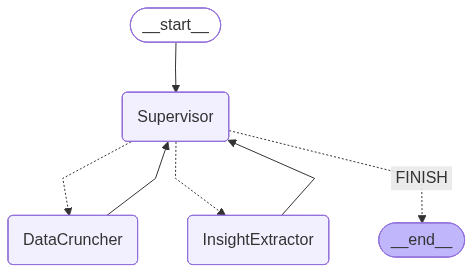


[Team 2: 전략 수립 팀 Strategy Planning Team]
--------------------------------------------------------------------------------


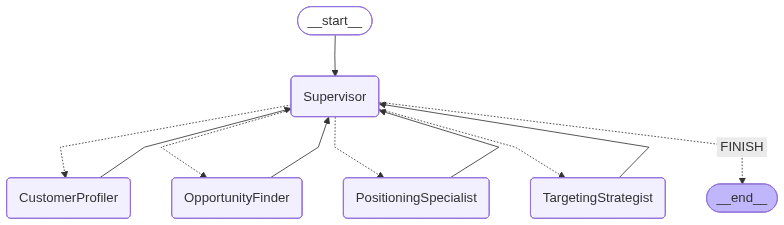


[Team 3: 실행 계획 생성 팀 Action Plan Generation Team]
--------------------------------------------------------------------------------


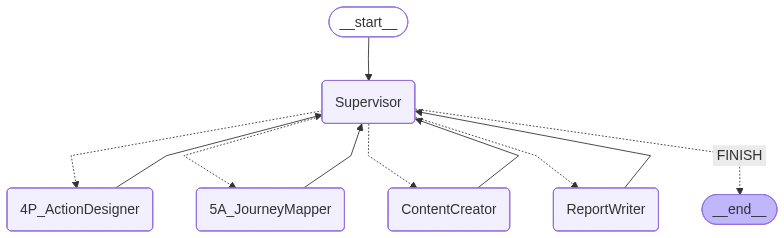


[Team 4: 단기 전술 팀 Tactical Execution Team]
--------------------------------------------------------------------------------


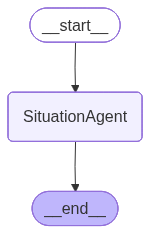


[Super-Graph: Complete Structure]
--------------------------------------------------------------------------------


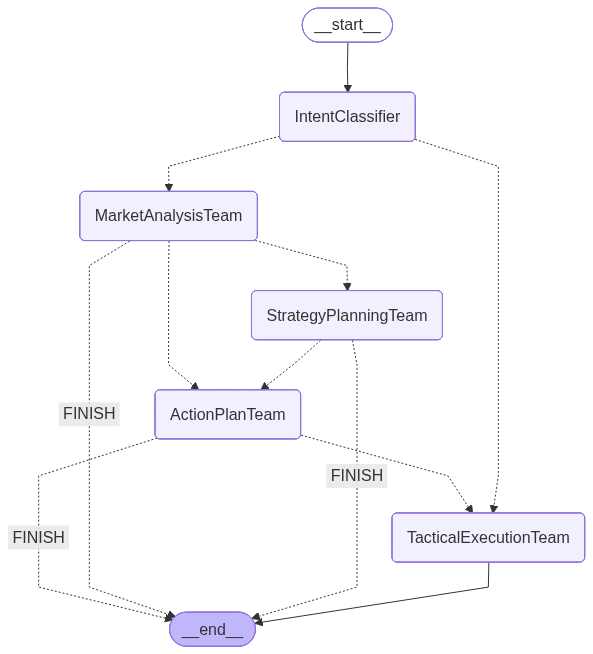


그래프 구조 확인 완료

[그래프 정보]
- Team 1 노드 수: 5
- Team 2 노드 수: 7
- Team 3 노드 수: 7
- Team 4 노드 수: 3
- Super-Graph 노드 수: 7


In [46]:
"""
마케팅 전략 수립 에이전트 팀 - 그래프 구조 확인용 코드
"""

from typing import TypedDict, List, Annotated, Literal
import operator
from langchain_core.messages import BaseMessage
from langgraph.graph import StateGraph, END
from pydantic import BaseModel


# ============================================================================
# 상태 정의
# ============================================================================

class SuperGraphState(TypedDict):
    """최상위 그래프 상태"""
    messages: Annotated[List[BaseMessage], operator.add]
    intent_tags: List[str]
    next: str


class MarketAnalysisState(TypedDict):
    """시장 분석 팀 상태"""
    messages: Annotated[List[BaseMessage], operator.add]
    team_members: List[str]
    next: str
    analysis_report: str
    chart_data: str


class StrategyPlanningState(TypedDict):
    """전략 수립 팀 상태"""
    messages: Annotated[List[BaseMessage], operator.add]
    team_members: List[str]
    next: str
    stp_strategy_document: str


class ActionPlanState(TypedDict):
    """실행 계획 생성 팀 상태"""
    messages: Annotated[List[BaseMessage], operator.add]
    team_members: List[str]
    next: str
    current_files: str


class TacticalExecutionState(TypedDict):
    """전술 실행 팀 상태"""
    messages: Annotated[List[BaseMessage], operator.add]
    next: str


# ============================================================================
# 더미 노드 함수들 (구조 확인용)
# ============================================================================

def intent_classifier_node(state):
    """의도 분류 노드"""
    return state


def data_cruncher_node(state):
    """데이터 분석가 노드"""
    return state


def insight_extractor_node(state):
    """인사이트 추출가 노드"""
    return state


def market_analysis_supervisor(state):
    """시장 분석 팀 감독자"""
    return {"next": "FINISH"}


def opportunity_finder_node(state):
    """시장 환경 분석가 노드"""
    return state


def customer_profiler_node(state):
    """고객 프로파일러 노드"""
    return state


def targeting_strategist_node(state):
    """타겟팅 전략가 노드"""
    return state


def positioning_specialist_node(state):
    """포지셔닝 전문가 노드"""
    return state


def strategy_planning_supervisor(state):
    """전략 수립 팀 감독자"""
    return {"next": "FINISH"}


def four_p_designer_node(state):
    """4P 액션 설계자 노드"""
    return state


def five_a_mapper_node(state):
    """5A 고객 여정 설계자 노드"""
    return state


def content_creator_node(state):
    """콘텐츠 크리에이터 노드"""
    return state


def report_writer_node(state):
    """보고서 작성자 노드"""
    return state


def action_plan_supervisor(state):
    """실행 계획 팀 감독자"""
    return {"next": "FINISH"}


def situation_agent_node(state):
    """상황 분석가 노드"""
    return state


# ============================================================================
# 라우팅 함수들
# ============================================================================

def get_next_node(state):
    """다음 노드 결정"""
    return state.get("next", "FINISH")


def route_based_on_intent(state):
    """의도 기반 초기 라우팅"""
    intent_tags = state.get("intent_tags", [])
    
    if "상황_전술_제안" in intent_tags and len(intent_tags) == 1:
        return "TacticalExecutionTeam"
    
    return "MarketAnalysisTeam"


def route_after_team_completion(state):
    """팀 완료 후 라우팅"""
    # 실제로는 메시지 분석 필요, 여기서는 간단히 처리
    return "FINISH"


# ============================================================================
# Team 1: 시장 분석 팀 그래프
# ============================================================================

market_analysis_graph = StateGraph(MarketAnalysisState)

# 노드 추가
market_analysis_graph.add_node("DataCruncher", data_cruncher_node)
market_analysis_graph.add_node("InsightExtractor", insight_extractor_node)
market_analysis_graph.add_node("Supervisor", market_analysis_supervisor)

# 엣지 추가
market_analysis_graph.add_edge("DataCruncher", "Supervisor")
market_analysis_graph.add_edge("InsightExtractor", "Supervisor")

# 조건부 엣지
market_analysis_graph.add_conditional_edges(
    "Supervisor",
    get_next_node,
    {
        "DataCruncher": "DataCruncher",
        "InsightExtractor": "InsightExtractor",
        "FINISH": END
    }
)

market_analysis_graph.set_entry_point("Supervisor")
market_analysis_team = market_analysis_graph.compile()


# ============================================================================
# Team 2: 전략 수립 팀 그래프
# ============================================================================


# 전략 수립 팀 그래프
strategy_planning_graph = StateGraph(StrategyPlanningState)

# 노드 추가
strategy_planning_graph.add_node("OpportunityFinder", opportunity_finder_node)
strategy_planning_graph.add_node("CustomerProfiler", customer_profiler_node)
strategy_planning_graph.add_node("TargetingStrategist", targeting_strategist_node)
strategy_planning_graph.add_node("PositioningSpecialist", positioning_specialist_node)
strategy_planning_graph.add_node("Supervisor", strategy_planning_supervisor)

# 엣지 추가
strategy_planning_graph.add_edge("OpportunityFinder", "Supervisor")
strategy_planning_graph.add_edge("CustomerProfiler", "Supervisor")
strategy_planning_graph.add_edge("TargetingStrategist", "Supervisor")
strategy_planning_graph.add_edge("PositioningSpecialist", "Supervisor")

# 조건부 엣지
strategy_planning_graph.add_conditional_edges(
    "Supervisor",
    get_next_node,
    {
        "OpportunityFinder": "OpportunityFinder",
        "CustomerProfiler": "CustomerProfiler",
        "TargetingStrategist": "TargetingStrategist",
        "PositioningSpecialist": "PositioningSpecialist",
        "FINISH": END
    }
)
strategy_planning_graph.set_entry_point("Supervisor")
strategy_planning_team = strategy_planning_graph.compile()


# ============================================================================
# Team 3: 실행 계획 생성 팀 그래프
# ============================================================================

action_plan_graph = StateGraph(ActionPlanState)

# 노드 추가
action_plan_graph.add_node("4P_ActionDesigner", four_p_designer_node)
action_plan_graph.add_node("5A_JourneyMapper", five_a_mapper_node)
action_plan_graph.add_node("ContentCreator", content_creator_node)
action_plan_graph.add_node("ReportWriter", report_writer_node)
action_plan_graph.add_node("Supervisor", action_plan_supervisor)

# 엣지 추가
action_plan_graph.add_edge("4P_ActionDesigner", "Supervisor")
action_plan_graph.add_edge("5A_JourneyMapper", "Supervisor")
action_plan_graph.add_edge("ContentCreator", "Supervisor")
action_plan_graph.add_edge("ReportWriter", "Supervisor")

# 조건부 엣지
action_plan_graph.add_conditional_edges(
    "Supervisor",
    get_next_node,
    {
        "4P_ActionDesigner": "4P_ActionDesigner",
        "5A_JourneyMapper": "5A_JourneyMapper",
        "ContentCreator": "ContentCreator",
        "ReportWriter": "ReportWriter",
        "FINISH": END
    }
)

action_plan_graph.set_entry_point("Supervisor")
action_plan_team = action_plan_graph.compile()


# ============================================================================
# Team 4: 전술 실행 팀 그래프
# ============================================================================

tactical_execution_graph = StateGraph(TacticalExecutionState)

# 노드 추가
tactical_execution_graph.add_node("SituationAgent", situation_agent_node)

# 엣지 추가
tactical_execution_graph.set_entry_point("SituationAgent")
tactical_execution_graph.add_edge("SituationAgent", END)

tactical_execution_team = tactical_execution_graph.compile()


# ============================================================================
# Super-Graph: 최상위 그래프
# ============================================================================

super_graph = StateGraph(SuperGraphState)

# 노드 추가
super_graph.add_node("IntentClassifier", intent_classifier_node)
super_graph.add_node("MarketAnalysisTeam", lambda x: x)  # 서브그래프 호출
super_graph.add_node("StrategyPlanningTeam", lambda x: x)  # 서브그래프 호출
super_graph.add_node("ActionPlanTeam", lambda x: x)  # 서브그래프 호출
super_graph.add_node("TacticalExecutionTeam", lambda x: x)  # 서브그래프 호출

# 시작점
super_graph.set_entry_point("IntentClassifier")

# 의도 분류 후 초기 라우팅
super_graph.add_conditional_edges(
    "IntentClassifier",
    route_based_on_intent,
    {
        "MarketAnalysisTeam": "MarketAnalysisTeam",
        "TacticalExecutionTeam": "TacticalExecutionTeam"
    }
)

# MarketAnalysisTeam 완료 후
super_graph.add_conditional_edges(
    "MarketAnalysisTeam",
    lambda x: "StrategyPlanningTeam",  # 간단히 처리
    {
        "StrategyPlanningTeam": "StrategyPlanningTeam",
        "ActionPlanTeam": "ActionPlanTeam",
        "FINISH": END
    }
)

# StrategyPlanningTeam 완료 후
super_graph.add_conditional_edges(
    "StrategyPlanningTeam",
    lambda x: "ActionPlanTeam",
    {
        "ActionPlanTeam": "ActionPlanTeam",
        "FINISH": END
    }
)

# ActionPlanTeam 완료 후
super_graph.add_conditional_edges(
    "ActionPlanTeam",
    lambda x: "FINISH",
    {
        "TacticalExecutionTeam": "TacticalExecutionTeam",
        "FINISH": END
    }
)

# TacticalExecutionTeam 완료
super_graph.add_edge("TacticalExecutionTeam", END)

# 최종 컴파일
marketing_super_graph = super_graph.compile()


# ============================================================================
# 그래프 시각화
# ============================================================================

if __name__ == "__main__":
    print("=" * 80)
    print("마케팅 전략 수립 에이전트 팀 - 그래프 구조")
    print("=" * 80)
    
    print("\n[Team 1: 시장 분석 팀 Market Analysis Team]")
    print("-" * 80)
    try:
        from IPython.display import Image, display
        display(Image(market_analysis_team.get_graph().draw_mermaid_png()))
    except:
        print(market_analysis_team.get_graph().draw_ascii())
    
    print("\n[Team 2: 전략 수립 팀 Strategy Planning Team]")
    print("-" * 80)
    try:
        display(Image(strategy_planning_team.get_graph().draw_mermaid_png()))
    except:
        print(strategy_planning_team.get_graph().draw_ascii())
    
    print("\n[Team 3: 실행 계획 생성 팀 Action Plan Generation Team]")
    print("-" * 80)
    try:
        display(Image(action_plan_team.get_graph().draw_mermaid_png()))
    except:
        print(action_plan_team.get_graph().draw_ascii())
    
    print("\n[Team 4: 단기 전술 팀 Tactical Execution Team]")
    print("-" * 80)
    try:
        display(Image(tactical_execution_team.get_graph().draw_mermaid_png()))
    except:
        print(tactical_execution_team.get_graph().draw_ascii())
    
    print("\n[Super-Graph: Complete Structure]")
    print("-" * 80)
    try:
        display(Image(marketing_super_graph.get_graph().draw_mermaid_png()))
    except:
        print(marketing_super_graph.get_graph().draw_ascii())
    
    print("\n" + "=" * 80)
    print("그래프 구조 확인 완료")
    print("=" * 80)
    
    # 각 그래프 정보 출력
    print("\n[그래프 정보]")
    print(f"- Team 1 노드 수: {len(market_analysis_team.get_graph().nodes)}")
    print(f"- Team 2 노드 수: {len(strategy_planning_team.get_graph().nodes)}")
    print(f"- Team 3 노드 수: {len(action_plan_team.get_graph().nodes)}")
    print(f"- Team 4 노드 수: {len(tactical_execution_team.get_graph().nodes)}")
    print(f"- Super-Graph 노드 수: {len(marketing_super_graph.get_graph().nodes)}")

## 1. 환경 설정

In [2]:
# 필요한 라이브러리 설치
# !pip install langchain langchain-openai langchain-community langgraph langchain-experimental python-dotenv

In [2]:
from dotenv import load_dotenv
import os

# API 키 로드
load_dotenv()

# 모델 이름 설정
MODEL_NAME = "gemini-2.5-flash" 

## 2. 공통 유틸리티 및 도구 정의

In [3]:
# !pip install langchain-experimental

In [4]:
import operator
from typing import List, TypedDict, Annotated, Literal, Optional, Dict
from pathlib import Path

from langchain_core.messages import BaseMessage, HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_experimental.tools import PythonREPLTool
from langchain_core.tools import tool
from langgraph.prebuilt import create_react_agent
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver
from pydantic import BaseModel

# 작업 디렉토리 설정
WORKING_DIRECTORY = Path("./marketing_output")
WORKING_DIRECTORY.mkdir(exist_ok=True)

## 3. 도구(Tools) 정의

In [10]:
# Python REPL 도구
python_repl_tool = PythonREPLTool()

# 파일 작성 도구
@tool
def write_document(
    content: Annotated[str, "문서에 작성할 텍스트 내용"],
    file_name: Annotated[str, "문서를 저장할 파일 경로"],
) -> Annotated[str, "저장된 문서 파일 경로"]:
    """텍스트 문서를 생성하고 저장합니다."""
    with (WORKING_DIRECTORY / file_name).open("w", encoding="utf-8") as file:
        file.write(content)
    return f"문서가 {file_name}에 저장되었습니다"

# 문서 읽기 도구
@tool
def read_document(
    file_name: Annotated[str, "읽을 문서의 파일 경로"],
    start: Annotated[Optional[int], "시작 줄 번호. 기본값은 0"] = None,
    end: Annotated[Optional[int], "종료 줄 번호. 기본값은 None"] = None,
) -> str:
    """지정된 문서를 읽습니다."""
    with (WORKING_DIRECTORY / file_name).open("r", encoding="utf-8") as file:
        lines = file.readlines()
    if start is None:
        start = 0
    return "".join(lines[start:end])

# 아웃라인 생성 도구
@tool
def create_outline(
    points: Annotated[List[str], "주요 포인트 또는 섹션 목록"],
    file_name: Annotated[str, "아웃라인을 저장할 파일 경로"],
) -> Annotated[str, "저장된 아웃라인 파일 경로"]:
    """아웃라인을 생성하고 저장합니다."""
    with (WORKING_DIRECTORY / file_name).open("w", encoding="utf-8") as file:
        for i, point in enumerate(points):
            file.write(f"{i + 1}. {point}\n")
    return f"아웃라인이 {file_name}에 저장되었습니다"

# 문서 편집 도구
@tool
def edit_document(
    file_name: Annotated[str, "편집할 문서의 파일 경로"],
    inserts: Annotated[
        Dict[int, str],
        "키는 줄 번호(1부터 시작), 값은 해당 줄에 삽입할 텍스트",
    ],
) -> Annotated[str, "편집된 문서의 파일 경로"]:
    """특정 줄 번호에 텍스트를 삽입하여 문서를 편집합니다."""
    with (WORKING_DIRECTORY / file_name).open("r", encoding="utf-8") as file:
        lines = file.readlines()

    sorted_inserts = sorted(inserts.items())

    for line_number, text in sorted_inserts:
        if 1 <= line_number <= len(lines) + 1:
            lines.insert(line_number - 1, text + "\n")
        else:
            return f"오류: 줄 번호 {line_number}가 범위를 벗어났습니다."

    with (WORKING_DIRECTORY / file_name).open("w", encoding="utf-8") as file:
        file.writelines(lines)

    return f"문서가 편집되어 {file_name}에 저장되었습니다"

# Team 1: 시장 분석 팀 (Market Analysis Team)


## 에이전트 팀 정의

분석팀(Analysis team)과 전략팀(Strategy team)을 정의
analysis_team = "Market Intelligence Team"
strategy_team = "Strategic Planning Team"

### 분석팀(Analysis team)

연구 팀은 `DataAnalyzer agent`와 `STP기반 마케팅 전략 도출을 담당하는 `stp_decision_maker`라는 두 개의 작업자 노드를 가집니다. 
`stp_decision_maker`는 시장데이터 기반 고객프로필을 생성하는 `market_customer_analyzer_node`와 이를 기반으로 targeting과 positioning을 분석하는 'stp_decision_maker_node'로 구성되어있습니다.
이들을 생성하고 팀 감독자도 설정해 보겠습니다.


① DataAnalyzer : CSV에서 통계 feature 추출  
② StrategyPlanner(STP) : DataAnalyzer결과(metrics)를 Prompt에 삽입해 맞춤 전략 생성

## 1. DataAnalyzer Agent

In [31]:
# 데이터 로딩 여부 테스트
df_big2 = pd.read_csv('/mnt/c/Users/rladl/Desktop/bigcontest_2025/2025_shcard_bigcontest/data/big_data_set2_f_re.csv',encoding='utf-8')
df_big3 = pd.read_csv('/mnt/c/Users/rladl/Desktop/bigcontest_2025/2025_shcard_bigcontest/data/big_data_set3_f_re.csv',encoding='utf-8')
df_final = pd.read_csv('/mnt/c/Users/rladl/Desktop/bigcontest_2025/2025_shcard_bigcontest/data/df_final.csv', encoding='cp949')
df_feature = pd.read_csv('/mnt/c/Users/rladl/Desktop/bigcontest_2025/2025_shcard_bigcontest/data/상권_feature.csv', encoding='utf-8')

① DataCruncher : CSV에서 통계 feature 추출  
- 기술통계, 상관분석, 업종분석, 위험도 분석 등
- load_and_preprocess_data()(파일 로드 안정적)   
→ data_cruncher_node(state)(가맹점 필터링, 통계분석, 전략결정)   
→ advanced_statistical_analysis(data_dict)(세부 분석 수행)   
→ Gemini 호출로 narrative 생성    

In [ ]:
import os
import json
import pandas as pd
import numpy as np
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import HumanMessage, AIMessage, BaseMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.graph import StateGraph, END
import operator
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

tool 정의

In [50]:
# 1. 데이터 로드
def load_and_preprocess_data():
    """데이터를 로드"""
    try:
        df_big2 = pd.read_csv('/mnt/c/Users/rladl/Desktop/bigcontest_2025/2025_shcard_bigcontest/data/big_data_set2_f_re.csv',encoding='utf-8')
        df_big3 = pd.read_csv('/mnt/c/Users/rladl/Desktop/bigcontest_2025/2025_shcard_bigcontest/data/big_data_set3_f_re.csv',encoding='utf-8')
        df_final = pd.read_csv('/mnt/c/Users/rladl/Desktop/bigcontest_2025/2025_shcard_bigcontest/data/df_final.csv', encoding='cp949')
        df_feature = pd.read_csv('/mnt/c/Users/rladl/Desktop/bigcontest_2025/2025_shcard_bigcontest/data/상권_feature.csv', encoding='utf-8')

        return {
            'big_data_set2': df_big2,
            'big_data_set3': df_big3,
            'df_final': df_final,
            'feature': df_feature
        }
    except Exception as e:
        print(f"데이터 로드 실패: {e}")
        return None

# ===========================
# 3. 고급 통계 분석 함수
# ===========================
def advanced_statistical_analysis(data_dict, target_store_id=None):
    """
    전체(final_df)를 기준으로 분석을 수행하고,
    target_store_id가 주어지면 해당 가맹점의 전체/상권 대비 상태만 별도 계산하여 반환.
    """
    analysis_result = {
        "1_데이터_개요": {},
        "2_기술통계": {},
        "3_상권분석": {},
        "4_업종분석": {},
        "5_위험도분석": {},
        "6_상관관계분석": {},
        "7_세그먼트분석": {},
        "8_이상치탐지": {},
        "9_target_store_analysis": {}
    }

    # 1) 데이터 개요 (기존처럼 모든 데이터프레임에 대해)
    for key, df in data_dict.items():
        try:
            missing_ratio = (df.isnull().sum() / len(df) * 100).round(2)
        except Exception:
            missing_ratio = {}
        analysis_result["1_데이터_개요"][key] = {
            "총_행수": int(df.shape[0]) if hasattr(df, 'shape') else None,
            "총_열수": int(df.shape[1]) if hasattr(df, 'shape') else None,
            "수치형_변수": int(df.select_dtypes(include=[np.number]).shape[1]) if hasattr(df, 'select_dtypes') else None,
            "범주형_변수": int(df.select_dtypes(exclude=[np.number]).shape[1]) if hasattr(df, 'select_dtypes') else None,
            "결측치_비율_상위5": missing_ratio[missing_ratio > 0].head(5).to_dict() if isinstance(missing_ratio, pd.Series) else {},
            "중복_행수": int(df.duplicated().sum()) if hasattr(df, 'duplicated') else None
        }

    # 메인 데이터 (항상 전체 사용)
    df_main = data_dict.get('df_final', list(data_dict.values())[0]).copy()

    # 폐업_flag 생성 (전체 DF에 추가)
    if '폐업일' in df_main.columns:
        df_main['폐업_flag'] = df_main['폐업일'].notna().astype(int)
    else:
        df_main['폐업_flag'] = 0

    date_like_cols = ['개설일', '폐업일']

    # 모든 수치형 컬럼 선택 (날짜형 제외)
    numeric_cols = [c for c in df_main.select_dtypes(include=[np.number]).columns.tolist() if c not in date_like_cols]

    # 2) 기술통계: 전체 기준, 모든 수치형
    stats_dict = {}
    for col in numeric_cols:
        s = df_main[col].dropna()
        if len(s) == 0:
            continue
        try:
            stats_dict[col] = {
                "개수": int(len(s)),
                "평균": float(s.mean()),
                "중앙값": float(s.median()),
                "표준편차": float(s.std()),
                "최소값": float(s.min()),
                "Q1": float(s.quantile(0.25)),
                "Q3": float(s.quantile(0.75)),
                "최대값": float(s.max()),
                "IQR": float(s.quantile(0.75) - s.quantile(0.25)),
                "왜도": float(stats.skew(s)),
                "첨도": float(stats.kurtosis(s)),
                "변동계수": float(s.std() / s.mean() * 100) if s.mean() != 0 else None
            }
        except Exception as e:
            stats_dict[col] = {"error": str(e)}
    analysis_result["2_기술통계"] = stats_dict

    # 3) 상권/4) 업종 분석 (전체 기준)
    sangwon_cols = [col for col in df_main.columns if '상권' in col]
    upjong_cols = [col for col in df_main.columns if '업종' in col or '서비스' in col]
    sangwon_col = sangwon_cols[0] if sangwon_cols else None
    upjong_col = upjong_cols[0] if upjong_cols else None

    if sangwon_col:
        san_summary = df_main.groupby(sangwon_col).agg({'가맹점구분번호': 'count'}).rename(columns={'가맹점구분번호':'점포수'}).sort_values('점포수', ascending=False)
        total = san_summary['점포수'].sum()
        analysis_result["3_상권분석"] = {
            "총_상권수": int(san_summary.shape[0]),
            "상위_10개_상권": {str(k): int(v) for k,v in san_summary.head(10)['점포수'].items()},
            "상권별_점포수_통계": {
                "평균": float(san_summary['점포수'].mean()),
                "중앙값": float(san_summary['점포수'].median()),
                "최대": int(san_summary['점포수'].max()),
                "최소": int(san_summary['점포수'].min())
            },
            "집중도_지표": {
                "상위10_비중": float(san_summary.head(10)['점포수'].sum() / total * 100) if total>0 else 0,
                "HHI_지수": float(((san_summary['점포수'] / total) ** 2).sum() * 10000) if total>0 else None
            }
        }

    if upjong_col:
        upjong_dist = df_main[upjong_col].value_counts()
        analysis_result["4_업종분석"] = {
            "총_업종수": int(upjong_dist.shape[0]),
            "상위_15개_업종": {str(k): int(v) for k,v in upjong_dist.head(15).items()},
            "업종별_점유율": {str(k): float(v) for k,v in (upjong_dist.head(15) / len(df_main) * 100).round(2).items()}
        }
        if sangwon_col:
            cross_tab = pd.crosstab(df_main[sangwon_col], df_main[upjong_col])
            top_combinations = cross_tab.stack().sort_values(ascending=False).head(10)
            analysis_result["4_업종분석"]["상권_업종_조합_상위10"] = {f"{k[0]}_{k[1]}": int(v) for k,v in top_combinations.items()}

    # 5) 위험도 분석 (전체 기준)
    risk_columns = [col for col in df_main.columns if 'risk' in col.lower() or '위험' in col or '생존' in col]
    risk_analysis = {}
    for rc in risk_columns:
        if pd.api.types.is_numeric_dtype(df_main.get(rc, pd.Series([], dtype=float))):
            s = df_main[rc].dropna()
            if len(s) == 0:
                continue
            try:
                df_main[f'{rc}_그룹'] = pd.qcut(df_main[rc], q=4, labels=['저위험','중저위험','중고위험','고위험'], duplicates='drop')
                grp = df_main[f'{rc}_그룹'].value_counts()
                risk_analysis[rc] = {
                    "평균": float(s.mean()),
                    "중앙값": float(s.median()),
                    "표준편차": float(s.std()),
                    "위험도_분포": {str(k): int(v) for k,v in grp.items()},
                    "고위험_비율": float(grp.get('고위험',0) / len(df_main) * 100) if '고위험' in grp else 0
                }
            except Exception as e:
                risk_analysis[rc] = {"error": str(e)}
    analysis_result["5_위험도분석"] = risk_analysis

    # 6) 상관관계 (전체 기준)
    if len(numeric_cols) >= 2:
        cols_for_corr = numeric_cols[:30]
        corr_matrix = df_main[cols_for_corr].corr()
        strong_corr = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                v = corr_matrix.iloc[i,j]
                if abs(v) > 0.5:
                    strong_corr.append({"변수1": corr_matrix.columns[i], "변수2": corr_matrix.columns[j], "상관계수": float(v)})
        analysis_result["6_상관관계분석"] = {"분석_변수수": len(cols_for_corr), "강한_상관관계_0.5이상": strong_corr[:20]}

    # 7) 세그먼트 분석 (클러스터링 개선, 다양한 알고리즘 포함)
    try:
        import hdbscan
        from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS
        from sklearn.mixture import GaussianMixture
        from sklearn.preprocessing import StandardScaler
        from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

        df_cluster_prep = df_main.copy()
        cluster_numeric = [c for c in df_cluster_prep.select_dtypes(include=[np.number]).columns.tolist()
                          if c not in ['가맹점구분번호'] + date_like_cols]
        if '가맹점구분번호' in cluster_numeric:
            cluster_numeric.remove('가맹점구분번호')

        cat_cols = []
        if upjong_col: cat_cols.append(upjong_col)
        if sangwon_col: cat_cols.append(sangwon_col)

        clust_df = df_cluster_prep[cluster_numeric + cat_cols].dropna()
        n_samples = len(clust_df)

        if n_samples >= 10 and len(cluster_numeric) >= 1:
            scaler = StandardScaler()
            scaled_num = scaler.fit_transform(clust_df[cluster_numeric])
            scaled_num_df = pd.DataFrame(scaled_num, index=clust_df.index, columns=cluster_numeric)

            if cat_cols:
                dummies = pd.get_dummies(clust_df[cat_cols].astype(str), prefix=cat_cols, drop_first=False)
                features_for_clust = pd.concat([scaled_num_df, dummies], axis=1)
            else:
                features_for_clust = scaled_num_df

            # 클러스터링 후보 모델
            models = {
                "KMeans": lambda k: KMeans(n_clusters=k, random_state=42, n_init=10),
                "Agglomerative": lambda k: AgglomerativeClustering(n_clusters=k),
                "GMM": lambda k: GaussianMixture(n_components=k, random_state=42),
                "DBSCAN": lambda eps: DBSCAN(eps=eps, min_samples=5),
                "OPTICS": lambda: OPTICS(min_samples=5),
                "HDBSCAN": lambda: hdbscan.HDBSCAN(min_cluster_size=5)
            }

            best_model = None
            best_score = -1
            best_method = None
            best_params = None

            # 1) KMeans / Agglomerative / GMM: k 후보 평가
            max_k = min(6, max(2, n_samples-1))
            for method, model_func in models.items():
                try:
                    if method in ["KMeans", "Agglomerative", "GMM"]:
                        for k in range(2, max_k+1):
                            model = model_func(k)
                            labels = model.fit_predict(features_for_clust)
                            if len(np.unique(labels)) < 2:
                                continue
                            sc = silhouette_score(features_for_clust, labels)
                            if sc > best_score:
                                best_score = sc
                                best_model = model
                                best_method = method
                                best_params = {"k": k}
                    else:  # DBSCAN, OPTICS, HDBSCAN
                        if method == "DBSCAN":
                            eps_values = np.linspace(0.3, 3, 10)
                            for eps in eps_values:
                                model = model_func(eps)
                                labels = model.fit_predict(features_for_clust)
                                if len(np.unique(labels)) < 2:
                                    continue
                                sc = silhouette_score(features_for_clust, labels)
                                if sc > best_score:
                                    best_score = sc
                                    best_model = model
                                    best_method = method
                                    best_params = {"eps": eps}
                        else:  # OPTICS, HDBSCAN
                            model = model_func()
                            labels = model.fit_predict(features_for_clust)
                            if len(np.unique(labels)) >= 2:
                                sc = silhouette_score(features_for_clust, labels)
                                if sc > best_score:
                                    best_score = sc
                                    best_model = model
                                    best_method = method
                                    best_params = {}
                except:
                    continue

            # 최적 모델로 클러스터링
            labels_final = best_model.fit_predict(features_for_clust) if best_method not in ["GMM"] else best_model.fit(features_for_clust).predict(features_for_clust)
            df_main['클러스터'] = np.nan
            df_main.loc[clust_df.index, '클러스터'] = labels_final

            # 클러스터별 요약
            cluster_summary = {}
            for cid in sorted(np.unique(labels_final)):
                idxs = clust_df.index[labels_final == cid]
                subset = df_main.loc[idxs]
                cnt = len(subset)
                means = {col: float(subset[col].mean()) if subset[col].notna().any() else None for col in cluster_numeric}
                top_upjong = subset[upjong_col].value_counts().head(5).to_dict() if upjong_col in subset.columns else {}
                top_sangwon = subset[sangwon_col].value_counts().head(5).to_dict() if sangwon_col in subset.columns else {}

                cluster_summary[f"클러스터_{int(cid)}"] = {
                    "데이터수": int(cnt),
                    "비율": float(cnt / n_samples * 100),
                    "수치형_평균": means,
                    "상위_업종": top_upjong,
                    "상위_상권": top_sangwon
                }

            analysis_result["7_세그먼트분석"] = {
                "선정_알고리즘": best_method,
                "클러스터_수": int(len(np.unique(labels_final))),
                "silhouette_score": float(best_score),
                "모델_파라미터": best_params,
                "클러스터별_특성": cluster_summary
            }
        else:
            analysis_result["7_세그먼트분석"] = {"메시지": "클러스터링 수행에 필요한 충분한 데이터가 없습니다."}

    except Exception as e:
        analysis_result["7_세그먼트분석"] = {"오류": str(e)}

    # 8) 이상치 탐지 (전체 기준) + 대상 가맹점 이상치 여부
    outlier_analysis = {}
    target_outlier_status = {}
    for col in numeric_cols:
        data = df_main[col].dropna()
        if len(data) > 0:
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            outliers = data[(data < lower) | (data > upper)]

            outlier_info = {
                "이상치_개수": int(len(outliers)),
                "이상치_비율": float(len(outliers) / len(data) * 100),
                "하한": float(lower),
                "상한": float(upper)
            }
            outlier_analysis[col] = outlier_info

            # target_store가 있으면 해당 가맹점의 값이 이상치인지 판단
            if target_store_id is not None and target_store_id in df_main["가맹점구분번호"].values:
                val = df_main.loc[df_main["가맹점구분번호"] == target_store_id, col].values[0]
                if val < lower or val > upper:
                    target_outlier_status[col] = f"이상치 (값: {val:.2f})"
                else:
                    target_outlier_status[col] = f"정상범위 (값: {val:.2f})"

    analysis_result["8_이상치탐지"] = {
        "전체_이상치정보": outlier_analysis,
        "대상가맹점_이상치여부": target_outlier_status
    }


    # 10) 대상 가맹점 비교 분석 개선
    target_summary = {}
    if target_store_id is not None:
        try:
            target_rows = df_main[df_main['가맹점구분번호'] == target_store_id]
            if len(target_rows) == 0:
                target_summary = {"message": f"가맹점 {target_store_id} 데이터 없음"}
            else:
                trow = target_rows.iloc[0]
                overall_pct = {}
                sw_pct = {}
                for metric in numeric_cols:
                    val = trow.get(metric, np.nan)
                    if pd.isna(val):
                        continue
                    # 전체 퍼센타일
                    rank = df_main[metric].rank(pct=True).loc[trow.name]
                    overall_pct[metric] = {
                        "값": float(val),
                        "백분위": float(rank * 100),
                        "설명": f"전체 상위 {100 - rank*100:.1f}% 수준" if rank > 0.5 else f"전체 하위 {rank*100:.1f}% 수준"
                    }
                    # 상권 내 퍼센타일
                    if sangwon_col and trow.get(sangwon_col) in df_main[sangwon_col].values:
                        sw_group = df_main[df_main[sangwon_col] == trow.get(sangwon_col)]
                        rank_sw = sw_group[metric].rank(pct=True).loc[trow.name]
                        sw_pct[metric] = {
                            "값": float(val),
                            "백분위": float(rank_sw * 100),
                            "설명": f"해당 상권 내 상위 {100 - rank_sw*100:.1f}% 수준" if rank_sw > 0.5 else f"상권 내 하위 {rank_sw*100:.1f}% 수준"
                        }

                cluster_label = int(trow['클러스터']) if '클러스터' in trow.index and not pd.isna(trow['클러스터']) else None
                target_summary = {
                    "가맹점구분번호": str(trow.get('가맹점구분번호')),
                    "가맹점명": str(trow.get('가맹점명')) if '가맹점명' in trow.index else None,
                    "상권": str(trow.get(sangwon_col)) if sangwon_col in trow.index else None,
                    "업종": str(trow.get(upjong_col)) if upjong_col in trow.index else None,
                    "클러스터": cluster_label,
                    "전체_비교": overall_pct,
                    "상권_비교": sw_pct
                }
        except Exception as e:
            target_summary = {"오류": str(e)}
    analysis_result["9_target_store_analysis"] = target_summary

    return analysis_result

In [49]:
# 데이터 로드
data_dict = load_and_preprocess_data()
# 고급 통계 분석 실행 (특정 가맹점 ID 예시
advanced_statistical_analysis(data_dict, target_store_id='0C67B8EDCF')

{'1_데이터_개요': {'big_data_set2': {'총_행수': 86590,
   '총_열수': 15,
   '수치형_변수': 8,
   '범주형_변수': 7,
   '결측치_비율_상위5': {'취소율 구간': 7.66},
   '중복_행수': 0},
  'big_data_set3': {'총_행수': 86590,
   '총_열수': 17,
   '수치형_변수': 16,
   '범주형_변수': 1,
   '결측치_비율_상위5': {},
   '중복_행수': 0},
  'df_final': {'총_행수': 4185,
   '총_열수': 17,
   '수치형_변수': 10,
   '범주형_변수': 7,
   '결측치_비율_상위5': {'브랜드구분코드': 87.05, '상권': 0.36, '폐업일': 96.97},
   '중복_행수': 0},
  'feature': {'총_행수': 21,
   '총_열수': 26,
   '수치형_변수': 25,
   '범주형_변수': 1,
   '결측치_비율_상위5': {'상권_평균_배달매출비율': 14.29},
   '중복_행수': 0}},
 '2_기술통계': {'comp_intensity': {'개수': 4185,
   '평균': 0.9627466889371397,
   '중앙값': 0.962746689,
   '표준편차': 1.2002929496065367,
   '최소값': -1.599225476,
   'Q1': -0.134839972,
   'Q3': 2.16381492,
   '최대값': 2.995790557,
   'IQR': 2.298654892,
   '왜도': 0.0553594474542946,
   '첨도': -1.2839175109910352,
   '변동계수': 124.67380707708745},
  'market_churn_rate_4w': {'개수': 4185,
   '평균': -0.02680244961278375,
   '중앙값': -0.0261121857,
   '표준편차': 0.0082411

 DataAnalyzer 노드

In [35]:
# AgentState 정의
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]
    
    # 분석 결과 관련
    analysis_report: str
    summary_data: dict
    strategy_mod: str                  # 전략 모드 (예: defensive, balanced, aggressive)
    risk_level: float        # 위험도 수준 (예: 23.5)

    # 가맹점 관련 정보
    target_store_id: str        # 가맹점 고유코드 (예: 7162A93F6B)
    target_store_name: str      # 가맹점명 (예: 한양대커피)
    target_region: str          # 지역명 (예: 성수동)

    # 프로세스 흐름 제어
    next: str

In [58]:
# 4. DataAnalyzer 노드 정의
def data_analyzer_node(state: AgentState):
    """고도화된 데이터 분석 및 JSON 생성, LLM narrative 생성
    - 제공된 데이터를 분석하여 매출, 고객, 경쟁, 리스크 관련 지표를 심층 분석
    - 주요 지표: 매출 성장률, 상권 내 경쟁 강도, 고객적합도점수, 리스크점수 등
    """

    print("DataAnalyzer 분석 시작...")

    # 데이터 로드
    data_dict = load_and_preprocess_data()

    if data_dict is None or len(data_dict) == 0:
        return {
            "messages": [HumanMessage(content="데이터 로드 실패")],
            "analysis_report": "",
            "summary_data": {},
            "next": END
        }

    # 특정 가맹점 필터링 
    target_store_name = state.get("target_store_name", None)
    target_store_id = state.get("target_store_id", None)

    if target_store_name or target_store_id:
        df_main = data_dict["df_final"]

        # 가맹점 기준 필터링
        if target_store_id:
            df_store = df_main[df_main["가맹점구분번호"] == target_store_id]
        else:
            df_store = df_main[df_main["가맹점명"].str.contains(target_store_name, na=False)]

        if len(df_store) == 0:
            print(f"가맹점 '{target_store_name or target_store_id}' 데이터 없음.")
        else:
            print(f"'{target_store_name or target_store_id}' 가맹점 데이터 {len(df_store)}건 발견")
            # 분석용 데이터 교체
            data_dict["df_final"] = df_store



    # 가맹점 통계 분석 수행 (dict 타입)
    summary_dict = advanced_statistical_analysis(data_dict)

    # 위험도 수준 판단
    risk_section = summary_dict.get("5_위험도분석", {})
    risk_key = next(iter(risk_section.keys()), None)

    if risk_key and "고위험_비율" in risk_section[risk_key]:
        high_risk_ratio = risk_section[risk_key]["고위험_비율"]
    else:
        high_risk_ratio = 0

    market_concentration = (summary_dict.get("3_상권분석", {})
                        .get("집중도_지표", {})
                        .get("상위10_비중", 0)
                            )

    # 전략 모드 결정
    if high_risk_ratio > 25:
        strategy_mode = "defensive"      # 방어적 전략
    elif high_risk_ratio > 15:
        strategy_mode = "balanced"       # 균형 전략
    else:
        strategy_mode = "aggressive"     # 공격적 전략


    # JSON 형식 변환(str 타입)
    json_output = json.dumps(summary_dict, ensure_ascii=False, indent=2)

    # LLM을 통한 narrative 생성
    print("LLM Narrative 생성 중...")
    llm = ChatGoogleGenerativeAI(
        model="gemini-2.5-flash",
        google_api_key=os.getenv("GOOGLE_API_KEY"),
        temperature=0.3
    )

    prompt = f"""
다음은 '{target_store_name}' 가맹점의 상권 및 매출 관련 데이터 분석 결과입니다.
데이터 전문가 관점에서, 이 가맹점의 강점·약점·기회·위험 요인을 중심으로 객관적 인사이트를 제시하세요.

아래는 데이터 컬럼의 정의와 해석 기준입니다.
이 정의를 참고하여, 주어진 JSON 데이터를 해석하고 점포의 상권 안정성, 경쟁 정도, 고객 적합도, 매출 추세, 위험도를 설명하세요.

# 컬럼 정의
- comp_intensity: 동일 업종 내 점포 밀집도 및 경쟁 정도 (높을수록 경쟁 심함)
- market_churn_rate_4w: 최근 4주간 점포 개폐업 변동률 (음수면 안정적)
- same_industry_sales_ratio: 업종 평균 대비 매출 비율 (1.0 기준)
- customer_fit_score: 상권 고객층과 업종의 적합도 점수 (높을수록 잘 맞음)
- avg_survival_months: 유사 점포의 평균 생존 개월수
- Δsales_4w: 최근 4주 매출 증감률 (양수면 매출 증가)
- sales_volatility_4w: 최근 4주간 매출 변동성 (높으면 불안정)
- risk_score_xgb: XGBoost 기반 폐업 위험도 점수 (0~1)
- 폐업_flag: 실제 폐업 여부 (1=폐업, 0=영업중)

분석 데이터:
{json_output}

요구사항:
1. 7-10문장으로 핵심 인사이트 요약
2. 수치와 통계 기반 객관적 해석
3. 비즈니스 의사결정에 활용 가능한 시사점 포함
4. 감정 표현 배제, 사실 중심 서술
5. 한글로 작성
6. 특이사항이나 주목할 만한 패턴 강조
"""

    response = llm.invoke(prompt)
    narrative = response.content

    # 최종 리포트 생성
    report = f"""
===DataAnalyzer 분석 리포트 핵심 인사이트===
{narrative}
"""
    
    return {
        "messages": [HumanMessage(content=f"DataAnalyzer 실행 완료\n{report.strip()}")],
        "analysis_report": report,          # 분석 리포트 (str)
        "summary_data": summary_dict,       # DataAnalyzer통계치 결과 (dict)
        "risk_level": high_risk_ratio,      # 위험도 수준 : 고위험_비율확인
        "strategy_mode": strategy_mode,     # 전략 : 방어적 전략 defensive,균형 전략 balanced, 공격적 전략 aggressive
        "next": "InsightExtractor"
    }

TEAM 1 gragh TEST

In [57]:
def create_dataanalyzer_graph():
    """DataAnalyzer Agent Graph 생성"""
    
    workflow = StateGraph(AgentState)
    workflow.add_node("DataAnalyzer", data_analyzer_node)
    workflow.set_entry_point("DataAnalyzer")
    workflow.add_conditional_edges(
        "DataAnalyzer",
        lambda x: x["next"],
        {
            "InsightExtractor": END,
            END: END
        }
    )
    
    return workflow.compile()


# 노드 테스트
if __name__ == "__main__":
    app = create_dataanalyzer_graph()
    
    initial_state = {
        "messages": [],
        "analysis_report": "",
        "summary_data": {}, # 다음 노드에서 .get()로 접근(딕셔너리)
        "target_store_id": "16184E93D9",
        "target_store_name": "",
        "target_region": "",
        "next": ""
        }
    
    result = app.invoke(initial_state)
    print(50*"=")
    print("최종 Agent node 결과 출력 : 분석 리포트 ")
    print(50*"=")
    print(result["analysis_report"]) # 분석 리포트 출력
    print(50*"=")
    print("최종 Agent node 결과 출력 : 통계 요약데이터 ")
    print(50*"=")
    print(json.dumps(result["summary_data"], ensure_ascii=False, indent=2)) # 통계 요약데이터 출력

DataAnalyzer 분석 시작...
'16184E93D9' 가맹점 데이터 1건 발견
LLM Narrative 생성 중...


E0000 00:00:1761163389.571165    7039 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


최종 Agent node 결과 출력 : 분석 리포트 

===DataAnalyzer 분석 리포트 핵심 인사이트===
데이터 전문가 관점에서 주어진 JSON 데이터를 해석하여 점포의 상권 안정성, 경쟁 정도, 고객 적합도, 매출 추세, 위험도를 분석한 결과는 다음과 같습니다.

해당 가맹점은 전반적으로 매우 안정적인 상권 환경에서 낮은 폐업 위험도를 보이는 것으로 판단됩니다. 상권의 최근 4주간 개폐업 변동률(`market_churn_rate_4w`: -0.0111)이 음수로 나타나 시장 안정성이 높으며, 유사 점포의 평균 생존 개월수(`avg_survival_months`: 671.53개월)가 매우 길어 장기적인 사업 지속 가능성이 높습니다. 상권 고객층과 업종의 적합도(`customer_fit_score`: 5.43)도 양호한 수준으로, 고객 기반이 탄탄함을 시사합니다.

경쟁 강도(`comp_intensity`: 2.99)는 중간 수준으로 존재하지만, XGBoost 기반 폐업 위험도(`risk_score_xgb`: 0.00126)가 극히 낮고 실제 폐업 플래그(`폐업_flag`: 0.0)가 없어 현재 영업 상태가 매우 견고합니다. 그러나 매출 측면에서는 개선의 여지가 있습니다. 최근 4주 매출 증감률(`Δsales_4w`: -0.0125)이 소폭 감소했으며, 업종 평균 대비 매출 비율(`same_industry_sales_ratio`: 0.9429)이 평균에 미치지 못하고 있습니다. 다행히 최근 4주간 매출 변동성(`sales_volatility_4w`: 0.0506)은 낮은 수준으로, 매출 감소가 급격한 불안정성에서 기인한 것은 아닙니다.

결론적으로, 이 점포는 매우 낮은 폐업 위험과 높은 상권 안정성을 바탕으로 견고한 입지를 가지고 있으나, 업종 평균 매출 달성 및 매출 증대를 위한 전략적 노력이 필요합니다. 이는 프로모션 강화나 고객 서비스 개선을 통해 충분히 달성 가능할 것으로 보입니다.

최종 Agent node 결과 출력 : 통계 요약데이터 


## 2. STP 전략 수립 Agent

In [62]:
from typing import TypedDict, Annotated, List
from langchain_core.messages import BaseMessage
import operator


# 1. 전략수립팀 State 정의

class StrategyPlanningState(TypedDict):
    # AgentState 정보
    messages: Annotated[List[BaseMessage], operator.add]
    team_members: List[str]
    next: str # 프로세스 흐름 제어
    
    # 가맹점 관련 정보
    target_store_id: str        # 가맹점 고유코드 (예: 7162A93F6B)
    target_store_name: str      # 가맹점명 (예: 한양대커피)
    target_region: str          # 지역명 (예: 성수동)

    # Agent 1 DataAnalyzer 정보
    analysis_report: str
    summary_data: dict  
    strategy_mode: str 
    risk_level: float   
    
    # Agent 2 전략 수립 팀 산출물
    stp_strategy_document: str  # STP 전략 보고서
    market_opportunities: str  # 시장 기회 및 위협
    customer_personas: str  # 고객 페르소나
    targeting_proposal: str  # 타겟팅 전략 제안서
    positioning_statement: str  # 포지셔닝 선언문


In [ ]:
# ===========================
# Team 2-1: Market & Customer Analyzer
# ===========================
def create_market_customer_prompt(strategy_mode: str, risk_level: float) -> str:
    """시장 기회 + 고객 페르소나를 동시에 생성"""
    
    mode_context = {
        "defensive": f"""⚠️ 방어적 전략 (위험도 {risk_level:.1f}%)
- 안정적 틈새시장 중심
- 기존 충성 고객 우선
- 리스크 최소화""",
        
        "aggressive": f"""✅ 공격적 전략 (위험도 {risk_level:.1f}%)
- 성장 시장 중심
- 신규 고객층 공략
- 기회 극대화""",
        
        "balanced": f"""⚖️ 균형 전략 (위험도 {risk_level:.1f}%)
- 안정 + 성장 시장 병행
- 기존 + 신규 고객 균형
- 단계적 확장"""
    }
    
    return f"""당신은 시장 분석 및 고객 인사이트 전문가입니다.

# 전략 방향
{mode_context.get(strategy_mode, mode_context["balanced"])}

# 미션
데이터 분석 결과를 바탕으로 다음 2가지를 동시에 도출하세요:
1. 시장 기회 진단 (Opportunity Analysis)
2. 고객 페르소나 (Customer Personas)

---

# 출력 형식

## PART A: 시장 기회 진단

### A1. 시장 환경 요약
- **상권 특성**: [HHI 지수, 집중도 해석]
- **경쟁 환경**: [경쟁 강도 분석]
- **업종 동향**: [업종 집중도, 트렌드]

### A2. 핵심 기회 요인 TOP 3
1. **기회 1**: [제목]
   - 근거: [데이터 기반]
   - 활용 방향: [어떻게 활용할 것인가]

2. **기회 2**: [제목]
   - 근거: [데이터 기반]
   - 활용 방향: [어떻게 활용할 것인가]

3. **기회 3**: [제목]
   - 근거: [데이터 기반]
   - 활용 방향: [어떻게 활용할 것인가]

### A3. 주요 위협 및 리스크
- [위협 요인 3가지와 대응 방향]

---

## PART B: 고객 페르소나

### 페르소나 1: [이름] (주력 타겟 후보)
- **기본정보**: 나이, 직업, 소득, 거주지
- **라이프스타일**: 일상, 관심사, 가치관
- **소비패턴**: 방문빈도, 객단가, 선호 채널
- **핵심니즈**: [3가지 구체적 욕구]
- **Pain Points**: [불편사항, 문제점]
- **데이터 근거**: [customer_fit_score 등]

### 페르소나 2: [이름] (보조 타겟 후보)
- [동일 형식]

### 페르소나 3: [이름] (틈새 타겟 후보)
- [동일 형식]

### 페르소나 요약표
| 구분 | 페르소나1 | 페르소나2 | 페르소나3 |
|------|-----------|-----------|-----------|
| 시장규모 | [추정] | [추정] | [추정] |
| 접근성 | [상/중/하] | [상/중/하] | [상/중/하] |
| 수익성 | [상/중/하] | [상/중/하] | [상/중/하] |
| 적합도 | [점수] | [점수] | [점수] |

---

# 작성 원칙
1. **시장 기회와 고객 특성의 연결**: PART A의 기회가 PART B의 페르소나와 자연스럽게 연결되도록
2. **데이터 기반**: 모든 주장은 입력 데이터로 뒷받침
3. **생생한 캐릭터**: "20대 여성" (X) → "김지은, 26세, 마케터" (O)
4. **전략 모드 일관성**: {strategy_mode} 방향을 유지

입력된 데이터를 충분히 활용하여 작성하세요."""


def market_customer_analyzer_node(state: OptimizedStrategyState):
    """시장 분석 + 고객 페르소나 동시 생성"""
    
    strategy_mode = state.get("strategy_mode", "balanced")
    risk_level = state.get("risk_level", 15.0)
    summary_data = state.get("summary_data", {})
    
    prompt = create_market_customer_prompt(strategy_mode, risk_level)
    
    # 데이터 컨텍스트 추가
    full_prompt = f"""{prompt}

---

# 입력 데이터

{json.dumps(summary_data, ensure_ascii=False, indent=2)}
"""
    
    llm = ChatGoogleGenerativeAI(
        model="gemini-2.5-flash",
        temperature=0.3,
        max_output_tokens=4096  # 충분한 출력 보장
    )
    
    response = llm.invoke(full_prompt)
    
    return {
        "messages": [HumanMessage(content=f"✅ 시장 및 고객 분석 완료\n\n{response.content[:500]}...")],
        "market_customer_analysis": response.content,
        "next": "STPDecisionMaker"
    }


# ===========================
# Team 2-2: STP Decision Maker
# ===========================
def create_stp_decision_prompt(strategy_mode: str, risk_level: float) -> str:
    """타겟 선정 + 포지셔닝을 연계하여 생성"""
    
    return f"""당신은 STP 전략 의사결정 및 포지셔닝 전문가입니다.

# 전략 방향
- 모드: {strategy_mode}
- 위험도: {risk_level:.1f}%

# 미션
이전 단계에서 도출된 시장 기회와 고객 페르소나를 바탕으로:
1. 최종 타겟 선정 (Targeting Decision)
2. 포지셔닝 전략 수립 (Positioning Strategy)

---

# 출력 형식

## PART A: 타겟팅 의사결정

### A1. 최종 선정 타겟
- **Primary Target**: [페르소나 이름]
- **Secondary Target**: [페르소나 이름] (선택적)

### A2. 선정 근거
**정량적 근거**
- 시장 규모: [추정치]
- 접근성: [상/중/하 + 이유]
- 수익성: [예상 기여도]

**정성적 근거**
- 시장 기회 연계: [PART A의 기회 요인과 어떻게 매칭되는가]
- 경쟁 우위: [우리가 이 타겟을 공략할 수 있는 이유]
- 전략 모드 적합성: [{strategy_mode} 전략에 부합하는 이유]

### A3. 타겟별 전략
**Primary Target 전략**
- 공략 방향: [구체적 접근법]
- 핵심 메시지: [어떤 메시지로 다가갈 것인가]
- 예상 효과: [정량 목표]

**Secondary Target 전략** (있는 경우)
- [동일 형식]

### A4. 제외된 페르소나 및 이유
- [페르소나 이름]: [제외 이유]

---

## PART B: 포지셔닝 전략

### B1. 핵심 포지셔닝 메시지
**"{strategy_mode} 전략에 최적화된 한 문장 슬로건"**

예시:
- Defensive: "10년 단골들이 증명하는 변함없는 맛"
- Aggressive: "당신의 일상을 특별하게 만드는 감성 맛집"
- Balanced: "가치를 아는 사람들의 선택"

### B2. USP (Unique Selling Proposition)
**우리만의 독특한 가치 3가지**
1. [USP 1]: [구체적 설명]
2. [USP 2]: [구체적 설명]
3. [USP 3]: [구체적 설명]

### B3. 경쟁사 대비 차별점
| 비교 요소 | 경쟁사 | 우리 | 차별화 포인트 |
|-----------|--------|------|---------------|
| [요소1] | [경쟁사 특성] | [우리 특성] | [차별점] |
| [요소2] | [경쟁사 특성] | [우리 특성] | [차별점] |
| [요소3] | [경쟁사 특성] | [우리 특성] | [차별점] |

### B4. 근거 데이터
- [핵심 지표 1]: [수치 + 해석]
- [핵심 지표 2]: [수치 + 해석]
- [핵심 지표 3]: [수치 + 해석]

### B5. 커뮤니케이션 방향
**톤앤매너**
- 언어: [격식체/친근한 반말/이모티콘 등]
- 감성: [신뢰/트렌디/프리미엄/친근함 등]

**핵심 키워드 5가지**
1. [키워드1]
2. [키워드2]
3. [키워드3]
4. [키워드4]
5. [키워드5]

**메시지 차별화**
- 타겟에게 전달할 핵심 가치: [30자 이내]
- 기억에 남을 후크: [인상적인 문구나 컨셉]

---

# 작성 원칙
1. **의사결정의 명확성**: 왜 이 타겟을 선택했는지 논리적으로 설명
2. **일관성**: 타겟팅과 포지셔닝이 하나의 스토리로 연결
3. **실행가능성**: 실제 적용 가능한 구체적 방향 제시
4. **차별화**: 경쟁사와 명확히 구분되는 포인트

이전 분석을 충분히 활용하여 작성하세요."""


def stp_decision_maker_node(state: OptimizedStrategyState):
    """타겟 선정 + 포지셔닝 연계 생성"""
    
    strategy_mode = state.get("strategy_mode", "balanced")
    risk_level = state.get("risk_level", 15.0)
    market_customer_analysis = state.get("market_customer_analysis", "")
    
    prompt = create_stp_decision_prompt(strategy_mode, risk_level)
    
    full_prompt = f"""{prompt}

---

# 이전 분석 결과

{market_customer_analysis}
"""
    
    llm = ChatGoogleGenerativeAI(
        model="gemini-2.5-flash",
        temperature=0.3,
        max_output_tokens=3072
    )
    
    response = llm.invoke(full_prompt)
    
    return {
        "messages": [HumanMessage(content=f"✅ STP 전략 수립 완료\n\n{response.content[:500]}...")],
        "targeting_positioning": response.content,
        "next": "MarketingMixDesigner"
    }


TEAM 2 graph 기준 테스트

In [ ]:

## trem2 TEST
workflow = StateGraph(OptimizedStrategyState)

# 노드 등록
workflow.add_node("MarketCustomerAnalyzer", market_customer_analyzer_node)
workflow.add_node("STPDecisionMaker", stp_decision_maker_node)

# 실행 경로 설정
workflow.set_entry_point("MarketCustomerAnalyzer")
workflow.add_edge("MarketCustomerAnalyzer", "STPDecisionMaker")
workflow.add_edge("STPDecisionMaker", END)

# 그래프 컴파일
app = workflow.compile()

# 🚀 테스트 실행

if __name__ == "__main__":
    initial_state = {
        "messages": [],
        "summary_data": {
            "region": "성수동",
            "category": "커피전문점",
            "monthly_sales": 45000000,
            "customer_loyalty": 0.68,
            "competition_index": 0.72
        },
        "strategy_mode": "balanced",
        "risk_level": 12.5
    }

    print("🚀 그래프 실행 시작")
    final_state = app.invoke(initial_state)
    print("\n✅ 실행 완료")

    print("\n--- 시장/고객 분석 ---")
    print(final_state["market_customer_analysis"][:300])

    print("\n--- STP 전략 ---")
    print(final_state["targeting_positioning"][:300])

🚀 그래프 실행 시작


E0000 00:00:1760788207.375858    4557 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1760788224.496667    4557 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.



✅ 실행 완료

--- 시장/고객 분석 ---
## PART A: 시장 기회 진단

### A1. 시장 환경 요약
- **상권 특성**: 성수동은 높은 HHI 지수를 가질 가능성이 높습니다. (구체적인 수치 데이터가 없으므로 일반적인 성수동 상권 특성을 기반으로 추론). 이는 특정 기업이나 브랜드가 시장을 주도하기보다는 다양한 개성을 가진 업체들이 공존하며, 소비자들의 선택 폭이 넓다는 것을 의미합니다.
- **경쟁 환경**: 경쟁 지수 0.72는 높은 경쟁 강도를 나타냅니다. 성수동 커피전문점 시장은 이미 포화 상태이며, 차별화된 전략 없이는 생존이 어려울 수 있습니다.
- **업종 동향**: 커피전문점은 성수동에서 높은 집중도를 보일 것으로 예상됩니다. (구체적인 수치 데이터가 없으므로 일반적인 성수동 상권 특성을 기반으로 추론). 트렌드는 스페셜티 커피, 디저트 페어링, 독특한 분위기, 로컬 브랜드와의 협업 등으로 나타납니다.

### A2. 핵심 기회 요인 TOP 3
1. **기회 1**: **로컬 브랜드 협업을 통한 차별화**
   - 근거: 성수동은 로컬 브랜드에 대한 관심도가 높고, 협업을 통해 새로운 경험을 제공하는 것에 대한 수요가 존재합니다. 높은 경쟁 강도 속에서 차별화된 포지셔닝을 가능하게 합니다.
   - 활용 방향: 성수동 내 다른 업종의 로컬 브랜드(예: 수제 맥주, 가죽 공방, 디자인 스튜디오)와 협업하여 콜라보레이션 메뉴 개발, 팝업 스토어 운영, 공동 마케팅 등을 진행합니다.

2. **기회 2**: **프리미엄 디저트 페어링 경험 제공**
   - 근거: 높은 고객 충성도(0.68)는 기존 고객의 재방문율이 높다는 것을 

--- STP 전략 ---
## PART A: 타겟팅 의사결정

### A1. 최종 선정 타겟
- **Primary Target**: 박선영
- **Secondary Target**: 김민준

### A2. 선정 근거
**정량적 근거**
- 시장 규모: 박선영 (중간), 김민준 (작음) - 성수동 거주 직

TEAM 1 + 2 TEST (Gragh 기반TEST)
- 소요 시간 : 

In [197]:
## trem1+2 TEST
workflow = StateGraph(OptimizedStrategyState)

# 노드 등록
workflow.add_node("DataCruncher", data_cruncher_node)
workflow.add_node("MarketCustomerAnalyzer", market_customer_analyzer_node)
workflow.add_node("STPDecisionMaker", stp_decision_maker_node)

# 실행 경로 설정
workflow.set_entry_point("DataCruncher")
workflow.add_edge("DataCruncher", "MarketCustomerAnalyzer")
workflow.add_edge("MarketCustomerAnalyzer", "STPDecisionMaker")
workflow.add_edge("STPDecisionMaker", END)

# 그래프 컴파일
app = workflow.compile()


# --- 5️⃣ 테스트 실행 ---
if __name__ == "__main__":
    initial_state = {
        "messages": [HumanMessage(content="시작합니다.")],
        "target_store_id": "7162A93F6B",
        "target_store_name": "마장동 성우**",
        "analysis_report": "",
        "summary_data": {},
        "strategy_mode": "defensive",
        "risk_level": 0.0,
        "next": ""
    }

    print("\n🚀 그래프 실행 시작...\n")
    final_state = app.invoke(initial_state)
    print("\n✅ 실행 완료!")
    print("-" * 60)

    print("\n📋 [최종 결과 요약]")
    # print(f"🎯 전략 모드: {final_state['strategy_mode']}")
    print(f"⚠️ 위험도: {final_state['risk_level']}")
    print(f"🗂️ 분석 요약: {final_state['summary_data']}")
    print(final_state)


🚀 그래프 실행 시작...


DataCruncher 고급 분석 시작...

🎯 '마장동 성우**' 가맹점 데이터 1건 발견.
고급 통계 분석 수행 중...
LLM Narrative 생성 중...


E0000 00:00:1760791522.693901    4557 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.



✅ 분석 완료!



E0000 00:00:1760791545.909458    4557 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1760791575.226715    4557 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.



✅ 실행 완료!
------------------------------------------------------------

📋 [최종 결과 요약]
⚠️ 위험도: 0
🗂️ 분석 요약: {'1_데이터_개요': {'big_data_set2': {'총_행수': 86590, '총_열수': 15, '수치형_변수': 8, '범주형_변수': 7, '결측치_비율_상위5': {'취소율 구간': 7.66}, '중복_행수': 0}, 'big_data_set3': {'총_행수': 86590, '총_열수': 17, '수치형_변수': 16, '범주형_변수': 1, '결측치_비율_상위5': {}, '중복_행수': 0}, 'df_final': {'총_행수': 1, '총_열수': 17, '수치형_변수': 10, '범주형_변수': 7, '결측치_비율_상위5': {'브랜드구분코드': 100.0, '폐업일': 100.0}, '중복_행수': 0}, 'feature': {'총_행수': 21, '총_열수': 26, '수치형_변수': 25, '범주형_변수': 1, '결측치_비율_상위5': {'상권_평균_배달매출비율': 14.29}, '중복_행수': 0}}, '2_기술통계': {'개설일': {'개수': 1, '평균': 20221024.0, '중앙값': 20221024.0, '표준편차': nan, '최소값': 20221024.0, 'Q1': 20221024.0, 'Q3': 20221024.0, '최대값': 20221024.0, 'IQR': 0.0, '왜도': nan, '첨도': nan, '변동계수': nan}, 'comp_intensity': {'개수': 1, '평균': 0.0814179467, '중앙값': 0.0814179467, '표준편차': nan, '최소값': 0.0814179467, 'Q1': 0.0814179467, 'Q3': 0.0814179467, '최대값': 0.0814179467, 'IQR': 0.0, '왜도': nan, '첨도': nan, '변동계수': nan}, 'market_ch

TEAM 3

In [ ]:
# ===========================
# Team 3-1: Marketing Mix Designer
# ===========================
def create_marketing_mix_prompt(strategy_mode: str) -> str:
    """4P + 5A를 연계하여 생성"""
    
    return f"""당신은 마케팅 믹스 및 고객 여정 설계 전문가입니다.

# 전략 모드: {strategy_mode}

# 미션
STP 전략을 실행 가능한 마케팅 계획으로 구체화:
1. 4P 실행 전략 (Product, Price, Place, Promotion)
2. 5A 고객 여정 설계 (Aware → Advocate)

---

# 출력 형식

## PART A: 4P 마케팅 믹스

### A1. Product (제품/서비스 전략)
**핵심 제품/서비스**
- [무엇을 판매할 것인가]

**제품 차별화 포인트**
- [경쟁사와 다른 점 3가지]

**개선/추가 제안**
- [ ] [액션 1]: [구체적 실행안]
- [ ] [액션 2]: [구체적 실행안]
- [ ] [액션 3]: [구체적 실행안]

### A2. Price (가격 전략)
**가격 정책**
- 기본 가격대: [금액 범위]
- 가격 포지셔닝: [프리미엄/중가/합리적]

**가격 근거**
- 타겟 고객 지불 의향: [분석]
- 경쟁사 대비: [비교]

**프로모션 가격 전략**
- [ ] [프로모션 1]: [할인율, 조건, 기간]
- [ ] [프로모션 2]: [번들, 조건, 기간]

### A3. Place (유통/접점 전략)
**주요 채널**
- 오프라인: [매장, 위치, 접근성]
- 온라인: [웹사이트, 앱, 배달앱]
- 기타: [팝업, 제휴 등]

**채널별 전략**
- [채널1]: [활용 방안]
- [채널2]: [활용 방안]

**접근성 개선안**
- [ ] [개선안 1]
- [ ] [개선안 2]

### A4. Promotion (촉진 전략)
**핵심 메시지**
- [포지셔닝 메시지 활용]

**프로모션 믹스**
- 광고: [채널, 예산, 메시지]
- PR: [언론, 인플루언서, 이벤트]
- 디지털: [SNS, 검색, 배너]
- 이벤트: [오프라인 행사]

**예산 배분 (우선순위)**
1. [채널명]: [예산 비율] - [이유]
2. [채널명]: [예산 비율] - [이유]
3. [채널명]: [예산 비율] - [이유]

---

## PART B: 5A 고객 여정 설계

### B1. Aware (인지 단계)
**목표**: 타겟 고객에게 브랜드를 알리기

**주요 접점**
- [SNS, 검색, 지도, 간판 등]

**구체적 액션**
- [ ] [액션 1]: [실행안 + KPI]
- [ ] [액션 2]: [실행안 + KPI]
- [ ] [액션 3]: [실행안 + KPI]

**예산**: [금액] | **기간**: [시작~종료]

### B2. Appeal (호감 단계)
**목표**: 긍정적 인상 형성

**주요 접점**
- [리뷰, 인스타, 후기 등]

**구체적 액션**
- [ ] [액션 1]: [실행안 + KPI]
- [ ] [액션 2]: [실행안 + KPI]
- [ ] [액션 3]: [실행안 + KPI]

**예산**: [금액] | **기간**: [시작~종료]

### B3. Ask (질문 단계)
**목표**: 정보 탐색 단계에서 선택받기

**주요 접점**
- [검색, 지도, 비교 사이트 등]

**구체적 액션**
- [ ] [액션 1]: [실행안 + KPI]
- [ ] [액션 2]: [실행안 + KPI]
- [ ] [액션 3]: [실행안 + KPI]

**예산**: [금액] | **기간**: [시작~종료]

### B4. Act (행동 단계)
**목표**: 실제 구매/방문 유도

**주요 접점**
- [매장, 앱, 결제 등]

**구체적 액션**
- [ ] [액션 1]: [실행안 + KPI]
- [ ] [액션 2]: [실행안 + KPI]
- [ ] [액션 3]: [실행안 + KPI]

**예산**: [금액] | **기간**: [시작~종료]

### B5. Advocate (옹호 단계)
**목표**: 충성 고객화 및 입소문 확산

**주요 접점**
- [재방문, 리뷰, 추천 등]

**구체적 액션**
- [ ] [액션 1]: [실행안 + KPI]
- [ ] [액션 2]: [실행안 + KPI]
- [ ] [액션 3]: [실행안 + KPI]

**예산**: [금액] | **기간**: [시작~종료]

---

# 작성 원칙
1. **STP 연계**: 모든 실행안은 타겟과 포지셔닝에 부합
2. **구체성**: "SNS 마케팅" (X) → "인스타그램 릴스 주 3회" (O)
3. **측정가능성**: 모든 액션에 KPI 명시
4. **4P와 5A의 연결**: 4P 전략이 5A 여정에서 어떻게 실행되는지 연결

이전 STP 전략을 충분히 반영하여 작성하세요."""


def marketing_mix_designer_node(state: OptimizedStrategyState):
    """4P + 5A 통합 설계"""
    
    strategy_mode = state.get("strategy_mode", "balanced")
    targeting_positioning = state.get("targeting_positioning", "")
    
    prompt = create_marketing_mix_prompt(strategy_mode)
    
    full_prompt = f"""{prompt}

---

# STP 전략 (참조)

{targeting_positioning}
"""
    
    llm = ChatGoogleGenerativeAI(
        model="gemini-2.0-flash-exp",
        temperature=0.3,
        max_output_tokens=4096
    )
    
    response = llm.invoke(full_prompt)
    
    return {
        "messages": [HumanMessage(content=f"✅ 마케팅 믹스 설계 완료\n\n{response.content[:500]}...")],
        "marketing_mix_plan": response.content,
        "next": "FinalReportWriter"
    }


# ===========================
# Team 3-2: Final Report Writer
# ===========================
def create_final_report_prompt() -> str:
    """콘텐츠 가이드 + 최종 보고서 통합"""
    
    return """당신은 마케팅 전략 보고서 작성 전문가입니다.

# 미션
지금까지의 모든 분석과 전략을 통합하여:
1. 콘텐츠 가이드 작성
2. 최종 보고서 완성

---

# 출력 형식

## PART A: 콘텐츠 제작 가이드

### A1. 핵심 콘텐츠 3종

**콘텐츠 1**: [제목]
- **목적**: [5A의 어떤 단계에서 활용]
- **형식**: [블로그/영상/인포그래픽/릴스 등]
- **핵심 메시지**: [전달할 내용]
- **제작 가이드**:
  - 톤: [친근한/전문적인/감성적인]
  - 길이: [300자/1분/A4 1장 등]
  - 필수 요소: [포함해야 할 내용]
  - 예시: [구체적 예시나 스크립트]

**콘텐츠 2**: [제목]
- [동일 형식]

**콘텐츠 3**: [제목]
- [동일 형식]

### A2. SNS 콘텐츠 캘린더 (4주)

| 주차 | 날짜 | 플랫폼 | 콘텐츠 유형 | 핵심 메시지 | 목표 |
|------|------|--------|-------------|-------------|------|
| 1주차 | 월 | 인스타그램 | [유형] | [메시지] | [목표] |
| 1주차 | 수 | 네이버블로그 | [유형] | [메시지] | [목표] |
| ... | ... | ... | ... | ... | ... |

### A3. 비주얼 & 톤앤매너 가이드

**비주얼 가이드**
- 메인 컬러: [색상코드]
- 보조 컬러: [색상코드]
- 이미지 스타일: [밝은/어두운/따뜻한/차가운]
- 필터/보정: [구체적 방향]

**언어 스타일**
- 호칭: [~님/친구/고객님]
- 문체: [격식체/반말/존댓말]
- 이모티콘: [사용 빈도와 종류]
- 금기어: [사용하지 말아야 할 표현]

### A4. 콘텐츠 제작 체크리스트
- [ ] 타겟 페르소나에 부합하는가?
- [ ] 포지셔닝 메시지와 일관성이 있는가?
- [ ] 행동 유도(CTA)가 명확한가?
- [ ] 브랜드 톤앤매너를 유지하는가?

---

## PART B: 실행 로드맵

### B1. 3개월 실행 계획

**1개월차 (Quick Win - 즉시 실행)**
- Week 1:
  - [ ] [액션 1]: [담당자, 예산, KPI]
  - [ ] [액션 2]: [담당자, 예산, KPI]
- Week 2-4:
  - [ ] [액션 3-5]

**2-3개월차 (Growth - 성장 단계)**
- [ ] [중기 액션 1-3]

**지속 (Sustain - 장기 전략)**
- [ ] [장기 액션 1-2]

### B2. 예산 계획

| 항목 | 세부 내역 | 예상 비용 | 우선순위 | 기대 효과 |
|------|-----------|-----------|----------|-----------|
| 광고 | [SNS 광고 등] | [금액] | High | [효과] |
| 콘텐츠 | [제작비] | [금액] | High | [효과] |
| ... | ... | ... | ... | ... |

**총 예산**: [금액]

### B3. KPI 및 성과 지표

**단기 KPI (1-3개월)**
- 신규 고객 수: [목표 수치]
- 방문자 수: [목표 수치]
- SNS 팔로워: [목표 수치]

**중장기 KPI (6개월~)**
- 매출: [목표 수치]
- 재방문율: [목표 %]
- 고객 만족도: [목표 점수]

---

## PART C: 최종 요약 (Executive Summary)

### C1. 전략 개요
- 현재 상황: [2-3문장 요약]
- 전략 방향: [핵심 전략 1문장]
- 타겟: [누구를]
- 포지셔닝: [어떻게]

### C2. 핵심 실행안 TOP 5
1. [액션 1]: [기대효과]
2. [액션 2]: [기대효과]
3. [액션 3]: [기대효과]
4. [액션 4]: [기대효과]
5. [액션 5]: [기대효과]

### C3. 성공 요인 및 리스크
**핵심 성공 요인**
- [요인 1]
- [요인 2]
- [요인 3]

**주요 리스크 및 대응**
- [리스크 1]: [대응 방안]
- [리스크 2]: [대응 방안]

### C4. 기대 효과
- 정량적: [매출 증가율, 고객 증가 수 등]
- 정성적: [브랜드 인지도, 고객 만족도 등]

---

# 작성 원칙
1. **실행가능성**: 즉시 적용 가능한 구체적 가이드
2. **통합성**: 모든 섹션이 하나의 스토리로 연결
3. **명확성**: 누가 읽어도 이해하고 실행 가능
4. **완결성**: 이 보고서만으로 전략 실행 가능

지금까지의 모든 분석과 전략을 충분히 활용하여 작성하세요."""


def final_report_writer_node(state: OptimizedStrategyState):
    """콘텐츠 가이드 + 최종 보고서 통합"""
    
    # 모든 이전 결과물 수집
    summary_data = state.get("summary_data", {})
    market_customer = state.get("market_customer_analysis", "")
    targeting_positioning = state.get("targeting_positioning", "")
    marketing_mix = state.get("marketing_mix_plan", "")
    strategy_mode = state.get("strategy_mode", "balanced")
    risk_level = state.get("risk_level", 15.0)
    
    prompt = create_final_report_prompt()
    
    # 전체 컨텍스트 구성
    full_prompt = f"""{prompt}

---

# 전체 분석 및 전략 내용

## 1. 데이터 분석 결과
{json.dumps(summary_data, ensure_ascii=False, indent=2)[:2000]}...

## 2. 시장 및 고객 분석
{market_customer}

## 3. STP 전략
{targeting_positioning}

## 4. 마케팅 믹스
{marketing_mix}

---

전략 모드: {strategy_mode}
위험도: {risk_level}%

위 모든 내용을 통합하여 최종 보고서를 완성하세요."""
    
    llm = ChatGoogleGenerativeAI(
        model="gemini-2.5-flash",
        temperature=0.2,  # 보고서는 더 정확하게
        max_output_tokens=4096
    )
    
    response = llm.invoke(full_prompt)
    
    # 최종 보고서 구성
    from datetime import datetime
    
    final_report = f"""
# 📊 마케팅 전략 및 실행 계획 최종 보고서

---

**보고서 생성일**: {datetime.now().strftime("%Y년 %m월 %d일")}
**전략 모드**: {strategy_mode.upper()}
**위험도 수준**: {risk_level:.1f}%

---

# 📋 목차

1. 데이터 분석 결과
2. 시장 기회 및 고객 분석
3. STP 전략 (Segmentation, Targeting, Positioning)
4. 마케팅 믹스 (4P + 5A)
5. 콘텐츠 가이드 및 실행 계획
6. 최종 요약

---

# 1. 데이터 분석 결과

(DataCruncher 결과 요약)

---

# 2. 시장 기회 및 고객 분석

{market_customer}

---

# 3. STP 전략

{targeting_positioning}

---

# 4. 마케팅 믹스

{marketing_mix}

---

# 5. 콘텐츠 가이드 및 실행 계획

{response.content}

---

**보고서 끝**
"""
    
    return {
        "messages": [HumanMessage(content=f"✅ 최종 보고서 작성 완료\n\n{final_report[:1000]}...")],
        "final_report": final_report,
        "next": END
    }



TEAM 1+TEAM2+TEAM 3 TEST

In [169]:
# ===========================
# 최종 Graph 구성 (5개 Agent)
# ===========================
workflow = StateGraph(OptimizedStrategyState)

# 5개 노드 등록
workflow.add_node("DataCruncher", data_cruncher_node)
workflow.add_node("MarketCustomerAnalyzer", market_customer_analyzer_node)
workflow.add_node("STPDecisionMaker", stp_decision_maker_node)
workflow.add_node("MarketingMixDesigner", marketing_mix_designer_node)
workflow.add_node("FinalReportWriter", final_report_writer_node)

# 선형 흐름
workflow.set_entry_point("DataCruncher")
workflow.add_edge("DataCruncher", "MarketCustomerAnalyzer")
workflow.add_edge("MarketCustomerAnalyzer", "STPDecisionMaker")
workflow.add_edge("STPDecisionMaker", "MarketingMixDesigner")
workflow.add_edge("MarketingMixDesigner", "FinalReportWriter")
workflow.add_edge("FinalReportWriter", END)

app = workflow.compile()


In [173]:
# ========================================
# 🚀 테스트 실행
# ========================================
if __name__ == "__main__":
    initial_state = {"messages": []}
    final_state = app.invoke(initial_state)

    print("✅ 전체 실행 완료")
    print("\n--- 최종 보고서 ---")
    print(final_state["final_report"])


🔄 DataCruncher 실행 중...
✅ 위험도: 22.5% → 전략 모드: balanced


E0000 00:00:1760788461.550566    4557 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1760788477.893244    4557 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1760788491.320947    4557 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1760788512.621173    4557 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


✅ 전체 실행 완료

--- 최종 보고서 ---

# 📊 마케팅 전략 및 실행 계획 최종 보고서

---

**보고서 생성일**: 2025년 10월 18일
**전략 모드**: BALANCED
**위험도 수준**: 22.5%

---

# 📋 목차

1. 데이터 분석 결과
2. 시장 기회 및 고객 분석
3. STP 전략 (Segmentation, Targeting, Positioning)
4. 마케팅 믹스 (4P + 5A)
5. 콘텐츠 가이드 및 실행 계획
6. 최종 요약

---

# 1. 데이터 분석 결과

(DataCruncher 결과 요약)

---

# 2. 시장 기회 및 고객 분석

## PART A: 시장 기회 진단

### A1. 시장 환경 요약
- **상권 특성**: HHI 지수 892.34는 비교적 낮은 수준으로, 상권 내 경쟁이 치열하지 않고 다양한 사업자가 존재할 가능성이 높습니다. 이는 신규 사업자가 진입하기에 유리한 환경일 수 있습니다.
- **경쟁 환경**: 총 상권 수가 127개인 반면, HHI 지수가 낮다는 것은 특정 상권에 경쟁이 집중되지 않고 분산되어 있음을 의미합니다. 따라서 경쟁 강도는 중간 정도로 판단됩니다.
- **업종 동향**: 총 48개의 업종이 존재하며 상위 5개 업종의 점유율이 72.8%를 차지합니다. 이는 특정 업종에 대한 집중도가 높다는 것을 의미하며, 해당 업종의 트렌드를 파악하고 차별화 전략을 수립하는 것이 중요합니다.

### A2. 핵심 기회 요인 TOP 3
1. **기회 1**: 틈새시장 공략을 통한 경쟁 우위 확보
   - 근거: 낮은 HHI 지수는 다양한 사업자가 존재할 가능성을 시사하며, 이는 틈새시장을 공략할 기회가 존재함을 의미합니다. 또한, 48개의 다양한 업종이 존재하므로, 기존 상위 업종과 차별화된 새로운 업종을 발굴할 수 있습니다.
   - 활용 방향: 상위 5개 업종 외의 다른 업종들을 분석하여 성장 가능성이 높은 틈새 업종을 발굴하고, 해당 업종에 특화된 상품이나 서비스를 제공하여 

추가적인 Agentic 플로우 추가

In [157]:
from typing import TypedDict, Annotated, List, Literal
from langchain_core.messages import BaseMessage, HumanMessage, SystemMessage
import operator

# ===========================
# State 정의
# ===========================
class AgenticStrategyState(TypedDict):
    messages: Annotated[List[BaseMessage], operator.add]
    
    # 데이터
    summary_data: dict
    strategy_mode: str
    risk_level: float
    
    # Agent 산출물
    market_customer_analysis: str
    targeting_positioning: str
    marketing_mix_plan: str
    final_report: str
    
    # Agentic 요소
    supervisor_decision: str  # 🔑 Supervisor의 의사결정
    iteration_count: int      # 🔑 반복 횟수
    quality_check: dict       # 🔑 품질 검증 결과
    next: str


In [ ]:
# ===========================
# 2️⃣ Quality Checker Agent (품질 검증)
# ===========================
def quality_checker_node(state: AgenticStrategyState):
    """각 단계 산출물의 품질을 검증하고 재작업 필요 여부 판단"""
    
    current_output = state.get("market_customer_analysis", "")
    strategy_mode = state.get("strategy_mode", "balanced")
    
    llm = ChatGoogleGenerativeAI(
        model="gemini-2.5-flash",
        temperature=0.1
    )
    
    check_prompt = f"""당신은 마케팅 전략 품질 검증 전문가입니다.

# 검증 대상
{current_output[:2000]}

# 검증 기준
1. **데이터 근거**: 주장이 데이터로 뒷받침되는가?
2. **구체성**: 추상적이지 않고 구체적인가?
3. **실행가능성**: 실제로 실행 가능한가?
4. **일관성**: 전략 모드({strategy_mode})와 일치하는가?
5. **완성도**: 누락된 섹션이 없는가?

# 출력 형식 (JSON)
{{
  "overall_score": 85,  // 0-100점
  "pass": true,  // 70점 이상이면 true
  "issues": [
    "페르소나 2의 데이터 근거 부족",
    "시장 기회 3번 항목이 추상적"
  ],
  "suggestions": [
    "customer_fit_score를 페르소나 2에 추가",
    "시장 기회 3번에 구체적 수치 추가"
  ],
  "decision": "APPROVE"  // APPROVE / REVISE / REJECT
}}

JSON만 출력하세요."""
    
    response = llm.invoke(check_prompt)
    
    import json
    try:
        quality_result = json.loads(response.content)
    except:
        quality_result = {"pass": True, "decision": "APPROVE", "overall_score": 75}
    
    return {
        "messages": [HumanMessage(content=f"✅ 품질 검증 완료: {quality_result['overall_score']}점")],
        "quality_check": quality_result,
        "next": "Supervisor"
    }



In [ ]:
# ===========================
# 3️⃣ Supervisor Agent (의사결정 + 라우팅)
# ===========================
def supervisor_node(state: AgenticStrategyState):
    """전체 워크플로우를 감독하고 다음 행동 결정"""
    
    iteration_count = state.get("iteration_count", 0)
    quality_check = state.get("quality_check", {})
    strategy_mode = state.get("strategy_mode", "balanced")
    risk_level = state.get("risk_level", 15.0)
    
    # 진행 상황 파악
    has_market_analysis = bool(state.get("market_customer_analysis"))
    has_stp = bool(state.get("targeting_positioning"))
    has_marketing_mix = bool(state.get("marketing_mix_plan"))
    has_report = bool(state.get("final_report"))
    
    llm = ChatGoogleGenerativeAI(
        model="gemini-2.0-flash-exp",
        temperature=0.3
    )
    
    supervisor_prompt = f"""당신은 마케팅 전략 수립 프로젝트의 총괄 책임자입니다.

# 현재 상황
- 전략 모드: {strategy_mode}
- 위험도: {risk_level}%
- 반복 횟수: {iteration_count}/3
- 진행 상태:
  - 시장/고객 분석: {'완료' if has_market_analysis else '미완료'}
  - STP 전략: {'완료' if has_stp else '미완료'}
  - 마케팅 믹스: {'완료' if has_marketing_mix else '미완료'}
  - 최종 보고서: {'완료' if has_report else '미완료'}

# 품질 검증 결과
{json.dumps(quality_check, ensure_ascii=False, indent=2)}

# 당신의 책임
1. 다음에 실행할 Agent 결정
2. 품질이 낮으면 재작업 지시
3. 추가 분석이 필요하면 지시
4. 전략 방향 수정이 필요하면 결정

# 선택 가능한 행동
- "MarketCustomerAnalyzer": 시장/고객 분석 (재)실행
- "STPDecisionMaker": STP 전략 수립
- "MarketingMixDesigner": 마케팅 믹스 설계
- "FinalReportWriter": 최종 보고서 작성
- "QualityChecker": 품질 재검증
- "DataCruncher": 데이터 재분석 (위험도 재평가)
- "FINISH": 프로젝트 완료

# 의사결정 룰
1. 품질 점수 < 70: 해당 Agent 재실행
2. 반복 횟수 >= 3: 현재 상태로 다음 단계 진행
3. 모든 단계 완료 + 품질 합격: FINISH
4. 위험도가 변경되었다면: 전략 모드 재설정

# 출력 형식 (JSON)
{{
  "reasoning": "현재 시장 분석의 품질이 65점으로 낮아 재작업 필요",
  "decision": "MarketCustomerAnalyzer",
  "instruction": "페르소나 2에 customer_fit_score 근거 추가 필요",
  "strategy_adjustment": null  // 또는 "defensive"로 변경 등
}}

JSON만 출력하세요."""
    
    response = llm.invoke(supervisor_prompt)
    
    try:
        decision = json.loads(response.content)
    except:
        # 기본 순차 진행
        if not has_market_analysis:
            decision = {"decision": "MarketCustomerAnalyzer", "reasoning": "시작"}
        elif not has_stp:
            decision = {"decision": "STPDecisionMaker", "reasoning": "다음 단계"}
        elif not has_marketing_mix:
            decision = {"decision": "MarketingMixDesigner", "reasoning": "다음 단계"}
        elif not has_report:
            decision = {"decision": "FinalReportWriter", "reasoning": "마지막 단계"}
        else:
            decision = {"decision": "FINISH", "reasoning": "완료"}
    
    next_node = decision["decision"]
    
    # 전략 모드 조정 필요 시
    if decision.get("strategy_adjustment"):
        state["strategy_mode"] = decision["strategy_adjustment"]
    
    return {
        "messages": [HumanMessage(content=f"🎯 Supervisor 결정: {next_node}\n이유: {decision['reasoning']}")],
        "supervisor_decision": json.dumps(decision, ensure_ascii=False),
        "iteration_count": iteration_count + 1,
        "next": next_node
    }


In [ ]:
# ===========================
# 4️⃣ Research Agent (자율적 추가 조사)
# ===========================
def research_agent_node(state: AgenticStrategyState):
    """Supervisor의 지시에 따라 추가 조사 수행"""
    
    supervisor_decision = json.loads(state.get("supervisor_decision", "{}"))
    instruction = supervisor_decision.get("instruction", "")
    
    llm = ChatGoogleGenerativeAI(
        model="gemini-2.5-flash",
        temperature=0.4
    )
    
    # 도구 사용 (web_search, python_repl 등)
    research_prompt = f"""당신은 추가 조사를 수행하는 리서치 전문가입니다.

# 지시사항
{instruction}

# 미션
부족한 정보를 보완하기 위해 추가 분석을 수행하세요.
- 데이터 재분석
- 외부 벤치마크 조사
- 경쟁사 분석
- 트렌드 조사

가능한 도구를 활용하여 구체적 정보를 수집하세요."""
    
    # 실제로는 여기서 web_search, python_repl 등을 사용
    response = llm.invoke(research_prompt)
    
    return {
        "messages": [HumanMessage(content=f"🔍 추가 조사 완료\n{response.content[:300]}...")],
        "next": "Supervisor"
    }


# ===========================
# 5️⃣ Critic Agent (비판적 검토)
# ===========================
def critic_agent_node(state: AgenticStrategyState):
    """전략의 허점을 찾아내고 개선안 제시"""
    
    targeting_positioning = state.get("targeting_positioning", "")
    strategy_mode = state.get("strategy_mode", "balanced")
    
    llm = ChatGoogleGenerativeAI(
        model="gemini-2.0-flash-exp",
        temperature=0.5  # 창의적 비판을 위해 높임
    )
    
    critic_prompt = f"""당신은 Devil's Advocate(악마의 변호인) 역할을 하는 전략 비평가입니다.

# 검토 대상 전략
{targeting_positioning}

# 당신의 역할
제시된 전략의 허점, 위험 요소, 놓친 부분을 지적하세요.
- 이 전략이 실패할 수 있는 시나리오는?
- 경쟁사가 대응하면 어떻게 될까?
- 타겟 고객이 반응하지 않는다면?
- 예산이 부족하다면?
- 외부 환경이 변화한다면?

# 출력 형식
{{
  "critical_issues": [
    {{"issue": "문제점", "severity": "High/Medium/Low", "impact": "영향"}},
  ],
  "alternative_suggestions": [
    "대안 1",
    "대안 2"
  ],
  "risk_mitigation": [
    "리스크 완화 방안 1"
  ],
  "overall_assessment": "종합 평가"
}}

JSON만 출력하세요."""
    
    response = llm.invoke(critic_prompt)
    
    try:
        critique = json.loads(response.content)
    except:
        critique = {"overall_assessment": "검토 완료"}
    
    return {
        "messages": [HumanMessage(content=f"🔴 비판적 검토 완료\n{json.dumps(critique, ensure_ascii=False, indent=2)[:500]}...")],
        "next": "Supervisor"
    }



In [ ]:

# ===========================
# 6️⃣ 수정된 Worker Agent (Supervisor 지시 반영)
# ===========================
def market_customer_analyzer_agentic(state: AgenticStrategyState):
    """Supervisor의 피드백을 반영한 분석"""
    
    supervisor_decision = json.loads(state.get("supervisor_decision", "{}"))
    instruction = supervisor_decision.get("instruction", "")
    iteration = state.get("iteration_count", 0)
    
    # 기존 프롬프트 + Supervisor 지시사항 추가
    base_prompt = create_market_customer_prompt(
        state.get("strategy_mode", "balanced"),
        state.get("risk_level", 15.0)
    )
    
    if instruction and iteration > 0:
        base_prompt += f"""

---

# ⚠️ Supervisor 피드백 (반영 필수)
{instruction}

위 피드백을 반드시 반영하여 재작성하세요."""
    
    llm = ChatGoogleGenerativeAI(
        model="gemini-2.0-flash-exp",
        temperature=0.3,
        max_output_tokens=4096
    )
    
    response = llm.invoke(base_prompt + f"\n\n{json.dumps(state['summary_data'], ensure_ascii=False)[:3000]}")
    
    return {
        "messages": [HumanMessage(content=f"✅ 시장/고객 분석 완료 (v{iteration})\n{response.content[:300]}...")],
        "market_customer_analysis": response.content,
        "next": "QualityChecker"  # 품질 검증으로
    }


# ===========================
# 7️⃣ Dynamic Router (조건부 라우팅)
# ===========================
def route_next_node(state: AgenticStrategyState) -> Literal[
    "MarketCustomerAnalyzer",
    "STPDecisionMaker", 
    "MarketingMixDesigner",
    "FinalReportWriter",
    "QualityChecker",
    "ResearchAgent",
    "CriticAgent",
    "DataCruncher",
    "FINISH"
]:
    """Supervisor의 결정에 따라 동적 라우팅"""
    
    next_action = state.get("next", "FINISH")
    
    # Supervisor가 결정한 다음 노드로 이동
    return next_action


# ===========================
# 8️⃣ Agentic Graph 구성
# ===========================
from langgraph.graph import StateGraph, END

workflow = StateGraph(AgenticStrategyState)

# 모든 Agent 등록
workflow.add_node("DataCruncher", data_cruncher_node)
workflow.add_node("Supervisor", supervisor_node)
workflow.add_node("MarketCustomerAnalyzer", market_customer_analyzer_agentic)
workflow.add_node("STPDecisionMaker", stp_decision_maker_node)
workflow.add_node("MarketingMixDesigner", marketing_mix_designer_node)
workflow.add_node("FinalReportWriter", final_report_writer_node)
workflow.add_node("QualityChecker", quality_checker_node)
workflow.add_node("ResearchAgent", research_agent_node)
workflow.add_node("CriticAgent", critic_agent_node)

# 시작: DataCruncher
workflow.set_entry_point("DataCruncher")

# DataCruncher → Supervisor
workflow.add_edge("DataCruncher", "Supervisor")

# Supervisor의 조건부 라우팅
workflow.add_conditional_edges(
    "Supervisor",
    route_next_node,
    {
        "MarketCustomerAnalyzer": "MarketCustomerAnalyzer",
        "STPDecisionMaker": "STPDecisionMaker",
        "MarketingMixDesigner": "MarketingMixDesigner",
        "FinalReportWriter": "FinalReportWriter",
        "QualityChecker": "QualityChecker",
        "ResearchAgent": "ResearchAgent",
        "CriticAgent": "CriticAgent",
        "DataCruncher": "DataCruncher",
        "FINISH": END
    }
)

# Worker들은 완료 후 Supervisor에게 보고
workflow.add_edge("MarketCustomerAnalyzer", "QualityChecker")
workflow.add_edge("STPDecisionMaker", "QualityChecker")
workflow.add_edge("MarketingMixDesigner", "QualityChecker")
workflow.add_edge("FinalReportWriter", "Supervisor")  # 최종은 바로 Supervisor
workflow.add_edge("QualityChecker", "Supervisor")
workflow.add_edge("ResearchAgent", "Supervisor")
workflow.add_edge("CriticAgent", "Supervisor")

# 컴파일
app = workflow.compile()


"""

## 🎯 Agentic 요소 정리

| Agentic 요소 | 구현 방식 | 효과 |
|-------------|----------|------|
| **자율적 의사결정** | Supervisor가 다음 행동 결정 | 상황에 따라 유연한 워크플로우 |
| **품질 피드백 루프** | QualityChecker → Supervisor → 재작업 | 품질 보장 |
| **비판적 검토** | CriticAgent가 허점 지적 | 전략 보완 |
| **동적 라우팅** | 조건부 엣지로 분기 | 획일적이지 않은 흐름 |
| **추가 조사** | ResearchAgent가 필요 시 조사 | 정보 보완 |
| **반복 개선** | iteration_count로 재작업 제한 | 무한 루프 방지 |
| **전략 조정** | Supervisor가 strategy_mode 변경 가능 | 적응적 전략 |



## 📊 실행 흐름 예시
```
DataCruncher (위험도 22% 발견)
    ↓
Supervisor (고위험으로 판단, defensive 모드 전환)
    ↓
MarketCustomerAnalyzer (방어적 분석 수행)
    ↓
QualityChecker (65점, 재작업 필요)
    ↓
Supervisor (재작업 지시 + 구체적 피드백)
    ↓
MarketCustomerAnalyzer (피드백 반영 재작성)
    ↓
QualityChecker (82점, 통과)
    ↓
Supervisor (다음 단계 진행)
    ↓
CriticAgent (전략 허점 검토)
    ↓
Supervisor (비판 반영 여부 결정)
    ↓
STPDecisionMaker
    ↓
"""

In [137]:
## 초기 기획
# 전략 수립 팀 상태
class StrategyPlanningState(TypedDict):
    messages: Annotated[List[BaseMessage], operator.add]
    team_members: List[str]
    next: str
    stp_strategy_document: str  # STP 전략 보고서
    market_opportunities: str  # 시장 기회 및 위협
    customer_personas: str  # 고객 페르소나
    targeting_proposal: str  # 타겟팅 전략 제안서
    positioning_statement: str  # 포지셔닝 선언문

# 기회 탐색가 (OpportunityFinder)
opportunity_finder_agent = create_react_agent(
    llm,
    tools=[python_repl_tool],
    prompt="""당신은 시장 기회 탐색 전문가입니다.
    
임무:
- Team 1의 종합 진단 보고서를 해석하여 마케팅의 기회와 위협 요소를 식별
- 외부 환경: 상권 건강도, 경쟁 강도, 리스크 분석
- 내부 역량: 운영 성과, 업종 내 위치 분석
- '우리가 싸울 운동장'의 상태를 진단

핵심 지표: 상권 내 경쟁 강도, 평균_생존개월수, 동일업종_매출비중

분석이 아닌 '해석'에 집중하여 실행 가능한 기회 요인을 도출하세요."""
)
opportunity_finder_node = agent_factory.create_agent_node(opportunity_finder_agent, "OpportunityFinder")

# 고객 프로파일러 (CustomerProfiler)
customer_profiler_agent = create_react_agent(
    llm,
    tools=[],
    prompt="""당신은 고객 페르소나 창조 전문가입니다.
    
임무:
- Team 1의 핵심 고객 데이터를 바탕으로 구체적인 페르소나 1~3개 생성
- 고객적합도점수(CUSTOMER_FIT_SCORE)를 핵심 지표로 활용
- 각 페르소나에 이름, 나이, 직업, 소비 패턴, 니즈, 행동 특성 부여

페르소나 예시:
- 이름: 김지은 (26세)
- 직업: 2년차 직장인
- 특성: 월급날 FLEX하는 가치 소비자
- 니즈: 지친 하루 끝의 프리미엄 경험

단순한 '20대 여성'이 아닌, 살아있는 캐릭터를 만드세요."""
)
customer_profiler_node = agent_factory.create_agent_node(customer_profiler_agent, "CustomerProfiler")

# 타겟팅 전략가 (TargetingStrategist)
targeting_strategist_agent = create_react_agent(
    llm,
    tools=[],
    prompt="""당신은 타겟팅 전략 의사결정 전문가입니다.
    
임무:
- OpportunityFinder의 시장 기회 분석과 CustomerProfiler의 페르소나를 교차 분석
- 가장 승률 높은 타겟 선정 (코어 타겟 유지 / 틈새 시장 공략 / 신규 타겟 확장)
- 명확한 근거와 함께 "타겟팅 전략 제안서" 작성

제안서 형식:
1. 추천 타겟: [페르소나 이름]
2. 선정 근거: [시장 기회 + 고객 특성 교차 분석]
3. 기대 효과: [정량적 목표]

'누구를 집중 공략할 것인가'에 대한 명확한 결론을 제시하세요."""
)
targeting_strategist_node = agent_factory.create_agent_node(targeting_strategist_agent, "TargetingStrategist")

# 포지셔닝 전문가 (PositioningSpecialist)
positioning_specialist_agent = create_react_agent(
    llm,
    tools=[],
    prompt="""당신은 포지셔닝 메시지 개발 전문가입니다.
    
임무:
- 확정된 타겟 고객에게 가장 매력적인 USP(독특한 판매 제안) 개발
- 데이터 기반의 구체적이고 설득력 있는 포지셔닝 메시지 도출
- 동일업종_매출비중, 재방문 고객비중, 객단가 등을 근거로 활용

포지셔닝 선언문 형식:
1. 핵심 메시지: [한 문장 슬로건]
2. USP: [우리만의 독특한 가치]
3. 근거 데이터: [뒷받침 지표]

예시:
- 타겟: 김지은 (26세, 2년차 직장인)
- 메시지: "지친 하루 끝, 김지은 님을 위한 프리미엄 배달 맛집"
- USP: 가치를 아는 사람들의 선택 (재방문율 상위 15%, 객단가 120% 프리미엄)"""
)
positioning_specialist_node = agent_factory.create_agent_node(positioning_specialist_agent, "PositioningSpecialist")

# 전략 수립 팀 감독자
strategy_planning_supervisor = create_team_supervisor(
    MODEL_NAME,
    """당신은 전략 수립 팀의 감독자이자 최종 의사결정권자입니다.
    
팀원: OpportunityFinder, CustomerProfiler, TargetingStrategist, PositioningSpecialist

작업 흐름:
1. Team 1의 종합 진단 보고서 수령
2. OpportunityFinder와 CustomerProfiler에게 동시 작업 지시
3. 두 결과물을 취합하여 TargetingStrategist에게 전달
4. 타겟팅 전략 제안서 검토 및 최종 타겟 확정 (의사결정)
5. 확정된 타겟을 PositioningSpecialist에게 전달
6. 모든 결과물을 종합하여 "STP 전략 보고서" 완성

책임:
- 각 단계별 품질 검토
- 전략 간 일관성 확보
- 최종 타겟 선정 의사결정
- STP 전략 보고서 최종 승인

일관되고 실행 가능한 STP 전략이 완성되면 FINISH를 선택하세요.""",
    ["OpportunityFinder", "CustomerProfiler", "TargetingStrategist", "PositioningSpecialist"]
)

# 전략 수립 팀 그래프
strategy_planning_graph = StateGraph(StrategyPlanningState)
strategy_planning_graph.add_node("OpportunityFinder", opportunity_finder_node)
strategy_planning_graph.add_node("CustomerProfiler", customer_profiler_node)
strategy_planning_graph.add_node("TargetingStrategist", targeting_strategist_node)
strategy_planning_graph.add_node("PositioningSpecialist", positioning_specialist_node)
strategy_planning_graph.add_node("Supervisor", strategy_planning_supervisor)

strategy_planning_graph.add_edge("OpportunityFinder", "Supervisor")
strategy_planning_graph.add_edge("CustomerProfiler", "Supervisor")
strategy_planning_graph.add_edge("TargetingStrategist", "Supervisor")
strategy_planning_graph.add_edge("PositioningSpecialist", "Supervisor")
strategy_planning_graph.add_conditional_edges(
    "Supervisor",
    get_next_node,
    {
        "OpportunityFinder": "OpportunityFinder",
        "CustomerProfiler": "CustomerProfiler",
        "TargetingStrategist": "TargetingStrategist",
        "PositioningSpecialist": "PositioningSpecialist",
        "FINISH": END
    }
)
strategy_planning_graph.set_entry_point("Supervisor")

strategy_planning_app = strategy_planning_graph.compile(checkpointer=MemorySaver())

E0000 00:00:1760779325.897758    4557 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


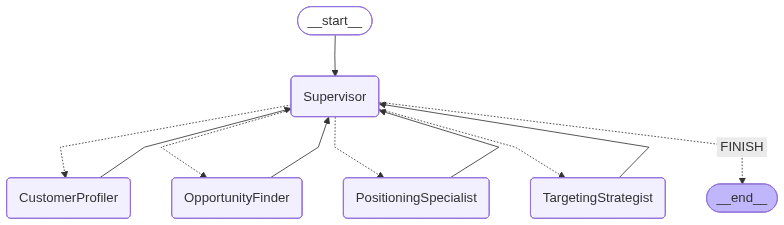

In [40]:
strategy_planning_app

In [50]:
## 전략 수립 최종 결과 예시
final_result_example ={
  "messages": [
    {
      "content": """
      \n    [Team 1 종합 진단 보고서]\n   
       Part 1. 사업 현황: 안정적 매출 성장률(강점)에도 불구,
        낮은 재방문율은 장기적 고객 관계 형성에 명백한 약점임.\n  
          Part 2. 시장 환경: 배달 수요의 꾸준한 증가는 기회 요인이나,
           상권 내 경쟁 강도가 매우 높아 신규 고객 유치가 어렵다는 위협이 공존함.
           \n    
           Part 3. 핵심 고객: 현재 매출은 '20대 여성, 고가치 소비층'이 주도하고 있으나,
            이들의 이탈률 또한 가장 높아 충성도 관리가 시급함.\n
            """,
      "additional_kwargs": {},
      "response_metadata": {},
      "name": "Supervisor"
    },
    {
      "content": "STP 전략 수립이 완료되었습니다. 최종 보고서를 확인해주세요.",
      "additional_kwargs": {},
      "response_metadata": {},
      "name": "Supervisor"
    }
  ],
  "team_members": [
    "OpportunityFinder",
    "CustomerProfiler",
    "TargetingStrategist",
    "PositioningSpecialist"
  ],
  "next": "Supervisor",
  "stp_strategy_document": """\n
					  # STP 전략 보고서\n\n## 
						  1. 시장 기회 및 핵심 전략 방향 (Segmentation)\n- 
						  **핵심 기회:** 상권 내 높은 경쟁을 직접 상대하기보다, 
						  꾸준히 성장하는 '프리미엄 배달 시장'을 공략하여 새로운 활로를 개척한다.
						  \n- **핵심 위협:** 기존 핵심 고객층(20대 여성)의 높은 이탈률을 방어하지
						   못하면 매출 기반이 흔들릴 수 있다.\n- 
						   
						   **전략 방향:** 신규 고객 유치와 기존 핵심 고객의 충성도 강화를 동시에
						    목표로 한다.\n\n
						    
						    ## 2. 목표 고객 정의 (Targeting)\n- 
						    **핵심 타겟 페르소나:** '김지은(26세, 2년차 직장인)'으로 정의한다. 
						    김지은은 퇴근 후 '나를 위한 보상'으로 가격이 조금 있더라도 
						    퀄리티 높은 배달 음식을 즐기는 성향을 가졌다.\n- 
						    **타겟 선정 이유:** 이 페르소나 그룹은 우리 가게의 높은 객단가를 유지하
						    
						    면서, '프리미엄 배달'이라는 새로운 시장 기회에 
						   
						    가장 잘 부합한다. 낮은 재방문율 문제를 해결할 충성 고객이 될 잠재력이
						     가장 크다.\n\n
						     
						     ## 3. 포지셔닝 (Positioning)\n- **USP (Unique Selling Proposition):** 
						     \"평범한 하루를 특별하게 만드는 미식 배달 경험\"
						     \n- **슬로건:** \"오늘만큼은, 나를 위한 미식\"\n- 
						     **핵심 메시지:** 우리는 단순한 음식 배달을 넘어, 
						     지친 하루 끝에 나에게 주는 특별한 선물 같은 경험을 제공하여
						      김지은과 같은 고객의 일상에 가치를 더한다.\n""",
  "market_opportunities": "\n- **기회:** 배달 시장이 꾸준히 성장하고 있으며, 특히 가격보다 가치를 중시하는 프리미엄 배달 수요가 증가하고 있다. 이는 우리의 높은 객단가와 잘 맞아떨어진다.\n- **위협:** 상권 내 경쟁이 매우 치열하여, 일반적인 오프라인 프로모션으로는 신규 고객 확보가 어렵다. 핵심 고객인 20대 여성의 이탈률이 높아 장기적인 성장에 걸림돌이 된다.\n",
  "customer_personas": "\n### 페르소나 1: 김지은 (26세, 2년차 직장인)\n- **소개:** 판교 IT 기업의 마케터. 잦은 야근과 스트레스로 지쳐있으며, 퇴근 후 '나를 위한 보상' 심리로 맛있는 음식을 먹는 것을 중요하게 생각한다.\n- **소비 패턴:** 배달 앱 VIP. 가격이 1~2만 원 더 비싸더라도, 리뷰가 좋고 특별한 메뉴를 제공하는 곳을 선호한다. '먹는 것'을 단순한 끼니 해결이 아닌 '경험'으로 생각한다.\n- **니즈(Needs):** 평범한 배달 음식 말고, 레스토랑에서 먹는 듯한 퀄리티와 특별한 기분을 느끼고 싶어 한다.\n",
  "targeting_proposal": "\n- **추천 타겟:** '김지은(26세)' 페르소나를 코어 타겟으로 설정할 것을 제안한다.\n- **근거:**\n  1.  **시장 기회 부합:** 성장하는 '프리미엄 배달' 시장의 핵심 고객층이다.\n  2.  **약점 보완 가능:** '경험'과 '가치'를 중시하므로, 만족 시 높은 충성도를 보일 가능성이 크다. 이는 우리의 가장 큰 약점인 '낮은 재방문율'을 개선할 수 있는 열쇠다.\n  3.  **강점 극대화:** 높은 객단가를 유지하며 매출을 견인할 수 있는 최적의 고객 그룹이다.\n",
  "positioning_statement": "\n- **USP (Unique Selling Proposition):** \"평범한 하루를 특별하게 만드는 미식 배달 경험\"\n- **슬로건:** \"오늘만큼은, 나를 위한 미식\"\n- **핵심 컨셉:** 우리는 음식을 파는 곳이 아니라, 고객의 지친 하루를 위로하고 특별한 순간을 선물하는 '라이프스타일 큐레이터'이다.\n"
}


## 7. Team 3: 실행 계획 생성 팀 (Action Plan Generation Team)

In [20]:
# 실행 계획 생성 팀 상태
class ActionPlanState(TypedDict):
    messages: Annotated[List[BaseMessage], operator.add]
    team_members: List[str]
    next: str
    current_files: str

# 상태 전처리 함수
def preprocess_action_plan(state):
    written_files = []
    try:
        written_files = [
            f.relative_to(WORKING_DIRECTORY) for f in WORKING_DIRECTORY.rglob("*")
        ]
    except Exception:
        pass
    
    if not written_files:
        return {**state, "current_files": "작성된 파일이 없습니다."}
    
    return {
        **state,
        "current_files": "\n팀에서 작성한 파일 목록:\n" + "\n".join([f" - {f}" for f in written_files]),
    }

# 4P 액션 설계자
four_p_action_designer_agent = create_react_agent(
    llm,
    tools=[],
    prompt="""당신은 4P 마케팅 믹스 전문가입니다.
    
임무:
- STP 전략에 맞춰 4P 관점의 구체적인 액션 아이디어 생성
  * Product(제품): 메뉴 개발, 서비스 개선
  * Price(가격): 가격 전략, 프로모션
  * Place(유통): 배달, 입지 활용
  * Promotion(촉진): 광고, 이벤트, 채널 전략

실행 가능한 구체적인 아이디어를 제시하세요."""
)
four_p_action_designer_node = agent_factory.create_agent_node(four_p_action_designer_agent, "4P_ActionDesigner")

# 5A 고객 여정 설계자
five_a_journey_mapper_agent = create_react_agent(
    llm,
    tools=[],
    prompt="""당신은 고객 여정 설계 전문가입니다.
    
임무:
- 5A 프레임워크로 고객 여정 설계
  * Aware(인지): 브랜드 인지도 향상
  * Appeal(호감): 긍정적 이미지 형성
  * Ask(질문): 정보 탐색 지원
  * Act(행동): 구매/방문 유도
  * Advocate(옹호): 재방문 및 추천 유도

각 단계별 구체적인 활동을 제안하세요."""
)
five_a_journey_mapper_node = agent_factory.create_agent_node(five_a_journey_mapper_agent, "5A_JourneyMapper")

# 콘텐츠 크리에이터
content_creator_agent = create_react_agent(
    llm,
    tools=[],
    prompt="""당신은 콘텐츠 제작 전문가입니다.
    
임무:
- 마케팅 채널별 구체적인 콘텐츠 가이드라인 생성
- 타겟 고객에 맞는 시각적 방향성 제시
- 채널 특성에 맞는 포스팅 형식 및 카피라이팅 예시
- 필수 해시태그 및 키워드 제안

예시:
- 인스타그램: 릴스 영상 컨셉, 이미지 스타일, 해시태그
- 블로그: 포스팅 구조, 키워드, SEO 최적화"""
)
content_creator_node = agent_factory.create_agent_node(content_creator_agent, "ContentCreator")

# 최종 보고서 작성자
report_writer_agent = create_react_agent(
    llm,
    tools=[create_outline, write_document, edit_document, read_document],
    prompt="""당신은 마케팅 보고서 작성 전문가입니다.
    
임무:
- 분석, STP 전략, 실행 계획을 종합한 최종 보고서 작성
- 소상공인이 이해하기 쉬운 구조와 언어 사용
- .md 파일 형식으로 저장

보고서 구조:
1. 요약 (Executive Summary)
2. 현황 분석
3. STP 전략
4. 실행 계획 (4P, 5A)
5. 콘텐츠 가이드라인"""
)
context_aware_report_writer = preprocess_action_plan | report_writer_agent
report_writer_node = agent_factory.create_agent_node(context_aware_report_writer, "ReportWriter")

# 실행 계획 생성 팀 감독자
action_plan_supervisor = create_team_supervisor(
    MODEL_NAME,
    """당신은 실행 계획 생성 팀의 감독자입니다.
    
팀원: 4P_ActionDesigner, 5A_JourneyMapper, ContentCreator, ReportWriter

작업 흐름:
1. 4P_ActionDesigner: 4P 관점의 액션 플랜
2. 5A_JourneyMapper: 고객 여정 기반 활동
3. ContentCreator: 콘텐츠 가이드라인 (필요시)
4. ReportWriter: 최종 보고서 작성

모든 실행 계획이 완성되면 FINISH를 선택하세요.""",
    ["4P_ActionDesigner", "5A_JourneyMapper", "ContentCreator", "ReportWriter"]
)

# 실행 계획 생성 팀 그래프
action_plan_graph = StateGraph(ActionPlanState)
action_plan_graph.add_node("4P_ActionDesigner", four_p_action_designer_node)
action_plan_graph.add_node("5A_JourneyMapper", five_a_journey_mapper_node)
action_plan_graph.add_node("ContentCreator", content_creator_node)
action_plan_graph.add_node("ReportWriter", report_writer_node)
action_plan_graph.add_node("Supervisor", action_plan_supervisor)

action_plan_graph.add_edge("4P_ActionDesigner", "Supervisor")
action_plan_graph.add_edge("5A_JourneyMapper", "Supervisor")
action_plan_graph.add_edge("ContentCreator", "Supervisor")
action_plan_graph.add_edge("ReportWriter", "Supervisor")
action_plan_graph.add_conditional_edges(
    "Supervisor",
    get_next_node,
    {
        "4P_ActionDesigner": "4P_ActionDesigner",
        "5A_JourneyMapper": "5A_JourneyMapper",
        "ContentCreator": "ContentCreator",
        "ReportWriter": "ReportWriter",
        "FINISH": END
    }
)
action_plan_graph.set_entry_point("Supervisor")

action_plan_app = action_plan_graph.compile(checkpointer=MemorySaver())

/tmp/ipykernel_4557/2334012627.py:22: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  @validator('next')
E0000 00:00:1760611218.391649    4557 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


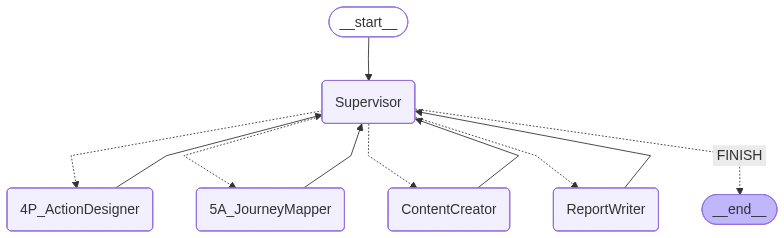

In [21]:
action_plan_app

## 8. Team 4: 전술 실행 팀 (Tactical Execution Team)

In [19]:
# 전술 실행 팀 상태
class TacticalExecutionState(TypedDict):
    messages: Annotated[List[BaseMessage], operator.add]
    next: str

# 상황 분석가 (Situation_Agent)
# 실제 구현 시 날씨 API, 웹 스크래핑 도구를 추가해야 합니다
situation_agent = create_react_agent(
    llm,
    tools=[],  # 실제로는 Weather API, TavilySearch 등 추가
    prompt="""당신은 실시간 상황 기반 전술 제안 전문가입니다.
    
임무:
- 날씨, 지역 행사, 시즌 등 외부 변수 파악
- 가게의 핵심 컨셉과 연결하여 즉각 실행 가능한 전술 제안
- 1~2개의 구체적이고 실행 가능한 단기 프로모션 아이디어

예시:
- "오늘 비 예보 → '비 오는 날 막걸리 20% 할인' 이벤트 SNS 공지"
- "인근 페스티벌 개최 → 방문객 대상 영수증 지참 시 음료 사이즈업"

Note: 이 제안은 기존 장기 전략의 방향성 안에서 이루어져야 합니다."""
)
situation_node = agent_factory.create_agent_node(situation_agent, "SituationAgent")

# 전술 실행 팀 그래프 (단일 에이전트)
tactical_execution_graph = StateGraph(TacticalExecutionState)
tactical_execution_graph.add_node("SituationAgent", situation_node)
tactical_execution_graph.set_entry_point("SituationAgent")
tactical_execution_graph.add_edge("SituationAgent", END)

tactical_execution_app = tactical_execution_graph.compile(checkpointer=MemorySaver())

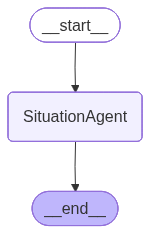

In [22]:
tactical_execution_app

## 9. Super-Graph: 최상위 감독자

In [ ]:
# Super-Graph 상태
class SuperGraphState(TypedDict):
    messages: Annotated[List[BaseMessage], operator.add]
    intent_tags: List[str]
    next: str

# 동적 라우팅 결정 함수
def route_based_on_intent(state: SuperGraphState) -> str:
    """의도 태그에 따라 다음 팀을 결정합니다."""
    intent_tags = state.get("intent_tags", [])
    
    # 상황 전술 제안만 필요한 경우
    if "상황_전술_제안" in intent_tags and len(intent_tags) == 1:
        return "TacticalExecutionTeam"
    
    # 콘텐츠 생성 가이드만 필요한 경우
    if "콘텐츠_생성_가이드" in intent_tags and "종합_전략_수립" not in intent_tags:
        return "MarketAnalysisTeam"  # 간단한 분석 후 바로 실행 계획으로
    
    # 종합 전략 수립이 필요한 경우 (기본)
    return "MarketAnalysisTeam"

# 팀 완료 후 다음 팀 결정 함수
def route_after_team_completion(state: SuperGraphState) -> str:
    """팀 작업 완료 후 다음 팀을 결정합니다."""
    last_message = state["messages"][-1]
    
    # 마지막 메시지에서 어떤 팀이 완료했는지 확인
    if "MarketAnalysisTeam" in str(last_message.name):
        # 콘텐츠 생성만 필요한 경우 전략 수립 팀 건너뛰기
        if "콘텐츠_생성_가이드" in state.get("intent_tags", []) and "종합_전략_수립" not in state.get("intent_tags", []):
            return "ActionPlanTeam"
        return "StrategyPlanningTeam"
    
    elif "StrategyPlanningTeam" in str(last_message.name):
        return "ActionPlanTeam"
    
    elif "ActionPlanTeam" in str(last_message.name):
        # 상황 전술 제안이 필요한 경우
        if "상황_전술_제안" in state.get("intent_tags", []):
            return "TacticalExecutionTeam"
        return "FINISH"
    
    elif "TacticalExecutionTeam" in str(last_message.name):
        return "FINISH"
    
    return "FINISH"

# 메시지 전달 함수
def get_last_message(state: SuperGraphState) -> dict:
    last_message = state["messages"][-1]
    if isinstance(last_message, str):
        return {"messages": [HumanMessage(content=last_message)]}
    else:
        return {"messages": [last_message]}

def join_graph(response: dict):
    return {"messages": [response["messages"][-1]]}

# Super-Graph 생성
super_graph = StateGraph(SuperGraphState)

# 의도 분류 노드 추가
super_graph.add_node("IntentClassifier", intent_classification_node)

# 팀 노드 추가
super_graph.add_node("MarketAnalysisTeam", get_last_message | market_analysis_app | join_graph)
super_graph.add_node("StrategyPlanningTeam", get_last_message | strategy_planning_app | join_graph)
super_graph.add_node("ActionPlanTeam", get_last_message | action_plan_app | join_graph)
super_graph.add_node("TacticalExecutionTeam", get_last_message | tactical_execution_app | join_graph)

# 시작점 설정
super_graph.set_entry_point("IntentClassifier")

# 의도 분류 후 초기 라우팅
super_graph.add_conditional_edges(
    "IntentClassifier",
    route_based_on_intent,
    {
        "MarketAnalysisTeam": "MarketAnalysisTeam",
        "TacticalExecutionTeam": "TacticalExecutionTeam"
    }
)

# 각 팀 완료 후 라우팅
super_graph.add_conditional_edges(
    "MarketAnalysisTeam",
    route_after_team_completion,
    {
        "StrategyPlanningTeam": "StrategyPlanningTeam",
        "ActionPlanTeam": "ActionPlanTeam",
        "FINISH": END
    }
)

super_graph.add_conditional_edges(
    "StrategyPlanningTeam",
    route_after_team_completion,
    {
        "ActionPlanTeam": "ActionPlanTeam",
        "FINISH": END
    }
)

super_graph.add_conditional_edges(
    "ActionPlanTeam",
    route_after_team_completion,
    {
        "TacticalExecutionTeam": "TacticalExecutionTeam",
        "FINISH": END
    }
)

super_graph.add_edge("TacticalExecutionTeam", END)

# 그래프 컴파일
marketing_super_graph = super_graph.compile(checkpointer=MemorySaver())

In [33]:
!pip install grandalf pyppeteer

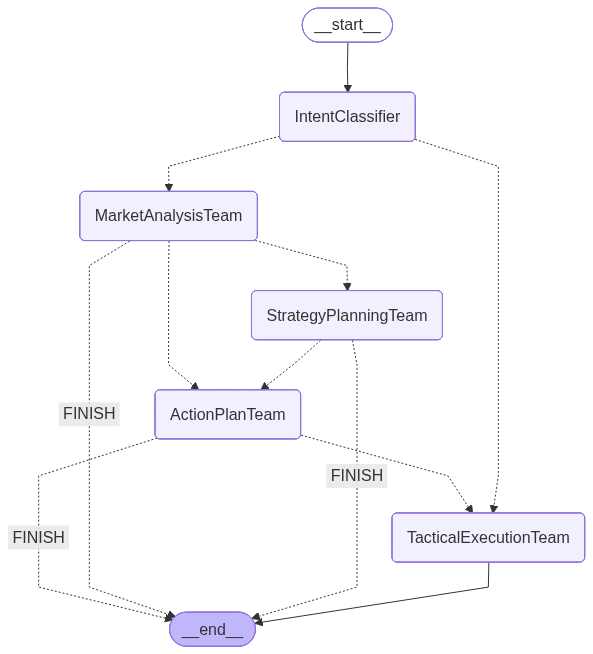

In [37]:
marketing_super_graph

## 10. 그래프 시각화

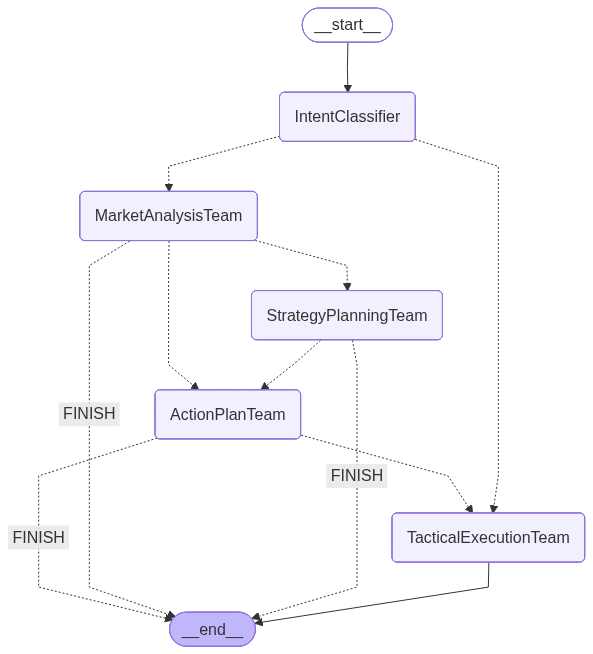

In [33]:
# 전체 Super-Graph 시각화
try:
    from IPython.display import Image, display
    display(Image(marketing_super_graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"그래프 시각화 오류: {e}")
    print("mermaid 또는 graphviz 설치가 필요할 수 있습니다.")

## 11. 테스트 실행

In [34]:
from langchain_core.runnables import RunnableConfig
import uuid

def run_marketing_graph(question: str, recursive_limit: int = 100):
    """마케팅 에이전트 팀을 실행합니다."""
    config = RunnableConfig(
        recursion_limit=recursive_limit,
        configurable={"thread_id": str(uuid.uuid4())}
    )
    
    inputs = {
        "messages": [HumanMessage(content=question)],
        "intent_tags": []
    }
    
    print("=" * 80)
    print("마케팅 전략 수립 에이전트 팀 실행")
    print("=" * 80)
    
    for step in marketing_super_graph.stream(inputs, config, stream_mode="values"):
        if "messages" in step and step["messages"]:
            last_message = step["messages"][-1]
            print(f"\n[{getattr(last_message, 'name', 'System')}]")
            print("-" * 80)
            print(last_message.content[:500] + "..." if len(last_message.content) > 500 else last_message.content)
    
    print("\n" + "=" * 80)
    print("작업 완료")
    print("=" * 80)
    
    return marketing_super_graph.get_state(config).values

### 테스트 케이스 1: 종합 전략 수립

In [35]:
# 테스트: 재방문률 향상 전략
result = run_marketing_graph(
    """카페 업종 가맹점입니다. 재방문률이 30% 이하로 낮은 상황입니다.
    매장에서 재방문률을 높일 수 있는 마케팅 아이디어와 근거를 제시해주세요."""
)

마케팅 전략 수립 에이전트 팀 실행

[None]
--------------------------------------------------------------------------------
카페 업종 가맹점입니다. 재방문률이 30% 이하로 낮은 상황입니다.
    매장에서 재방문률을 높일 수 있는 마케팅 아이디어와 근거를 제시해주세요.

[None]
--------------------------------------------------------------------------------
의도 분류 완료: 종합_전략_수립
이유: 사용자가 재방문율이 낮은 문제 상황을 제시하고, 이를 개선하기 위한 마케팅 아이디어와 근거를 요청하고 있습니다. 이는 문제 진단, 근본 원인 분석, 장기적 전략 수립이 필요한 포괄적인 질문이므로 [종합_전략_수립]으로 분류합니다.


/home/rladl/miniconda3/envs/bigcon/lib/python3.12/site-packages/langchain_google_genai/chat_models.py:2007: UserWarning: HumanMessage with empty content was removed to prevent API error
  warnings.warn(
/home/rladl/miniconda3/envs/bigcon/lib/python3.12/site-packages/langchain_google_genai/chat_models.py:2007: UserWarning: HumanMessage with empty content was removed to prevent API error
  warnings.warn(
/home/rladl/miniconda3/envs/bigcon/lib/python3.12/site-packages/langchain_google_genai/chat_models.py:2007: UserWarning: HumanMessage with empty content was removed to prevent API error
  warnings.warn(
/home/rladl/miniconda3/envs/bigcon/lib/python3.12/site-packages/langchain_google_genai/chat_models.py:2007: UserWarning: HumanMessage with empty content was removed to prevent API error
  warnings.warn(
/home/rladl/miniconda3/envs/bigcon/lib/python3.12/site-packages/langchain_google_genai/chat_models.py:2007: UserWarning: HumanMessage with empty content was removed to prevent API error
  

KeyboardInterrupt: 

### 테스트 케이스 2: 콘텐츠 생성 가이드

In [ ]:
# 테스트: 인스타그램 홍보 방안
result = run_marketing_graph(
    "치킨 업종 가맹점입니다. 인스타그램 홍보 방안 가이드를 알려주세요."
)

### 테스트 케이스 3: 상황 전술 제안

In [ ]:
# 테스트: 날씨 기반 전술
result = run_marketing_graph(
    """카페 업종 가맹점입니다. 성수동에 위치하고 있습니다.
    비 오는 날의 마케팅 전략과 성수동 근처에서 최근 있는 행사에 어울리는 
    마케팅 전략을 고안해주세요."""
)

## 12. 결과 확인

In [ ]:
# 생성된 파일 목록 확인
import os

print("생성된 파일 목록:")
print("=" * 80)
for file in os.listdir(WORKING_DIRECTORY):
    file_path = WORKING_DIRECTORY / file
    if file_path.is_file():
        print(f"- {file} ({file_path.stat().st_size} bytes)")

In [ ]:
# 생성된 보고서 확인 (있는 경우)
report_files = [f for f in os.listdir(WORKING_DIRECTORY) if f.endswith('.md')]

if report_files:
    from IPython.display import Markdown, display
    
    for report_file in report_files:
        print(f"\n{'='*80}")
        print(f"파일: {report_file}")
        print(f"{'='*80}\n")
        
        with open(WORKING_DIRECTORY / report_file, 'r', encoding='utf-8') as f:
            display(Markdown(f.read()))